In [8]:
!pip install python-binance

In [9]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client

import warnings
warnings.filterwarnings('ignore')

In [10]:
class Binance():
    methods = {
            # public methods
            'ping':             {'url':'api/v1/ping', 'method': 'GET', 'private': False},
            'time':             {'url':'api/v1/time', 'method': 'GET', 'private': False},
            'exchangeInfo':     {'url':'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
            'depth':            {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
            'trades':           {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
            'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
            'aggTrades':        {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
            'klines':           {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
            'ticker24hr':       {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
            'tickerPrice':      {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
            'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
            # private methods
            'createOrder':      {'url': 'api/v3/order', 'method': 'POST', 'private': True},
            'testOrder':        {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
            'orderInfo':        {'url': 'api/v3/order', 'method': 'GET', 'private': True},
            'cancelOrder':      {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
            'openOrders':       {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
            'allOrders':        {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
            'account':          {'url': 'api/v3/account', 'method': 'GET', 'private': True},
            'myTrades':         {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
            # wapi
            'depositAddress':   {'url': 'wapi/v3/depositAddress.html', 'method':'GET', 'private':True},
            'withdraw':   {'url': 'wapi/v3/withdraw.html', 'method':'POST', 'private':True},
            'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method':'GET', 'private':True},
            'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method':'GET', 'private':True},
            'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method':'GET', 'private':True},
            'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method':'GET', 'private':True},
            'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method':'GET', 'private':True},
            'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method':'GET', 'private':True},
            'assetDust': {'url': 'sapi/v1/asset/dust', 'method':'POST', 'private':True},
            'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method':'GET', 'private':True},
            'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method':'GET', 'private':True},
            #sapi
            'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private':True},
            'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
            'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
            'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
            'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
            'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private':True},
            'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private':True},
            'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private':True},
            'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private':True},
            'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private':True},
            'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private':True},
            'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private':True},
            'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private':True},
            'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private':True},
            'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private':True},
            'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private':True},
            'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private':True},
            #futures
            'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
            'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
            'futuresCreateOrder':      {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
            'futuresAccount':      {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
            'futuresBalance':      {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
            'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
            'futuresCancelOrder':      {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
   }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)
        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url ='https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url  + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature="+str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type":"application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url, data="" if self.methods[command]['method'] == 'GET' else payload_str, headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()

bot = Binance(
    API_KEY='5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN',
    API_SECRET='XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'
)

In [11]:
def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY = api_keys['apikey'],API_SECRET = api_keys['apisecret']))
    return clients

_API_LIST_ = [
{'apikey': 'EvnNm9TKqsC2p48HsCdApx7c0UHgFLXByOL6hPjWIKeLS8TvOifSvZnqEa6mniWI', 'apisecret': 'r1j02rVBir11OKOVeiPe2LvJ8klDC6bm3NSjNfNJSMKkwiTHc6iix2om4fbsIaOf'},
{'apikey': '5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN', 'apisecret': 'XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'},
{'apikey': 'XEWksNXgijYkBfokp9Nnq2aBbS8VtaKRBXr15bebFAUx99q2KI2xhi75NNM7yms4', 'apisecret': 'fUO81kg0bKL4Ig1p7kqih2eW25XjnGD0soPTUbMt2riMZv0YAr1LDoPeynJENcA7'},
{'apikey': 'LbsKC75PVp12pPaxpUzctmO5IxIEUdX3bLqpQAbkzslFwbL2c64Mt4sJUjqQMSgr', 'apisecret': 'ScyapZew18D8cTncyrVocaBevr4M0WPmBG8K0ACgJ2XFCDMxevItzQdS9VN2uYmC'},
{'apikey': 'PWUrujIHQsQPMlm2nTQwAwqDy3eVVFpXQJ8jOWbEBnqjhoSGCr5F1m2rYUDRWaSY', 'apisecret': 'SMtNYX9fg3fEPZUuKYhHHKB3mbatfH7WwjqblmKuItglTKlou0XJR607tccoXFyu'},
{'apikey': 'mkPWLpmy8MCDvx1xiZzRaHwkz8MlYyYQynHcsKCbnNsCLG4IUv2RK03ndPrJKT3B', 'apisecret': 'TWtchKvd32ok72kJddHRmllaX4x8Ad2PmInIKHkRZgV3YDj6YjJSzYXosedUh1AU'},
{'apikey': '5JJHdFEUAflZNKxvPXYgLfsMiGPxjxKlYD4HEMx5aihaRBgAETw4rV0jnAEGm5dh', 'apisecret': 'T5R22DoslDUbN7ORjML3sRLR6lSzm5I3SwXaErhT5MbdCMe4NpIJbF7kGrsacl0T'},
{'apikey': 'Iq1xfyElTdk3velugqvaVp1aiAWbAcxyQLs2DzHJySTZCNeMQP243tiQGdoUhCl7', 'apisecret': '8zKsD55iPxy5ND6AFukxEUqK8PcMLatdXG7scG8HWgomPBQOtRoZSFvjALgrT3Ew'},
{'apikey': 'Iab3YDpTeSLo9xSMSLKnoZStZ1R23uVn4eikCrelCgtzPytVfHSMPZPB6woXQJuF', 'apisecret': 'hxjOl74MI6UAA3WyTa8hcWjenFS3kKa5IkYNzM9r5DHCyjE3a0gXhqLZJGP4kcG3'},
{'apikey': 'UQrazVFv3aAOdd6zCyRf5RvjjQRrxUBg3qxy7t8Eru9qkQdDGYUhiYergXqOxe9g', 'apisecret': 'n5uXrojJxtyI5xq8L7IHAPCFx4ldYy1z4hcoY4tzf3Od74e9NJCDV00WPmyZcyxG'},
{'apikey': 'lzarzgM9sE6qbUove5X0Gqu9lQn7HNz820GF6ZgeqKRNEmjmBUZYOYQlMWtLuj1q', 'apisecret': 'Q8CxToI8rk6DJMlesarKxLDs8w3TH6XqhSaguJaL60BnRxzapgbKhXEJzrxvK4fW'},
{'apikey': '7RHAc0yqJGTSGbnxIiZZa1xm9YKxa0gFpJU0bkcSaGn2OaaWm9xfdhPbNRa2A8sS', 'apisecret': 'paJc7wlu34QGufetvR77WQDblHzhHYgA8NX8m6tpkwU3xW2ssJ2q7ODxNI3TcjUv'},
{'apikey': 'pZ1trU1ahK8fcykT29rpkATMT4sTdFQgGzruqLW09g4c4bsveYRF8sANpgc78Gz9', 'apisecret': 'pWOT5QrGJ8dcYdXChL3aMyG1GPVxtC5zxmTXFPEvRpl9Vyrmrt0hUqcelDkKYY2d'}
]

In [12]:
coin_list=[]
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [13]:
new_coin_list=[]
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent'])>7 or float(vol['priceChangePercent'])<-7:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['KAVAUSDT', 'SNXUSDT']


In [22]:
_LIMIT_ = 1000
_SYMBOL_ = 'SNXUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

In [23]:
def TimeNow():
  now = datetime.now()
  return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
  a = True
  while a:
    time.sleep(0.1)
    _timenow_ = str(TimeNow()).split(":")
    _timenow_ = _timenow_[len(_timenow_)-1]
    if int(_timenow_)%5 == 0:
      a = False

def TimeStampNow():
  return time.time()

def check(a, b):
  for i in a:
    if b == i:
      return True
  return False
def MinetsTimestamp(minets):
  return minets*60*1000
def TimestampToNormal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')
def NormalToTimestamp(inputTime):
  return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp()*1000)
def klines_parsing(_klines_):
  _klines_final_ = []

  for _i_ in _klines_:
    _klines_final_.append({
    "Open time": TimestampToNormal(_i_[0]+60*60*3*1000),
    "Open": float(_i_[1]),
    "High": float(_i_[2]),
    "Low": float(_i_[3]),
    "Close": float(_i_[4]),
    "Volume": float(_i_[5]),
    "Close time": TimestampToNormal(_i_[6]+60*60*3*1000),
    "Quote asset volume": _i_[7],
    "Number of trades": _i_[8],
    "Taker buy base asset volume": _i_[9],
    "Taker buy quote asset volume": _i_[10],
    "Ignore": _i_[11]
    })
  return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close = []
close_max = []
close_min = []
for i in range(1, 37):
  _MINETS_ = 240
  _INTERVAL_ = "5m"

  _klines_ = bot.klines(
                symbol=_SYMBOL_,
                limit=_MINETS_,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
  )
  _klines_ = klines_parsing(_klines_)
  _klines_ = pd.DataFrame(_klines_)
  for i in _klines_['Close']:
    close.append(i)
  close_max.append(max(close))
  close_min.append(min(close))
  close.clear()

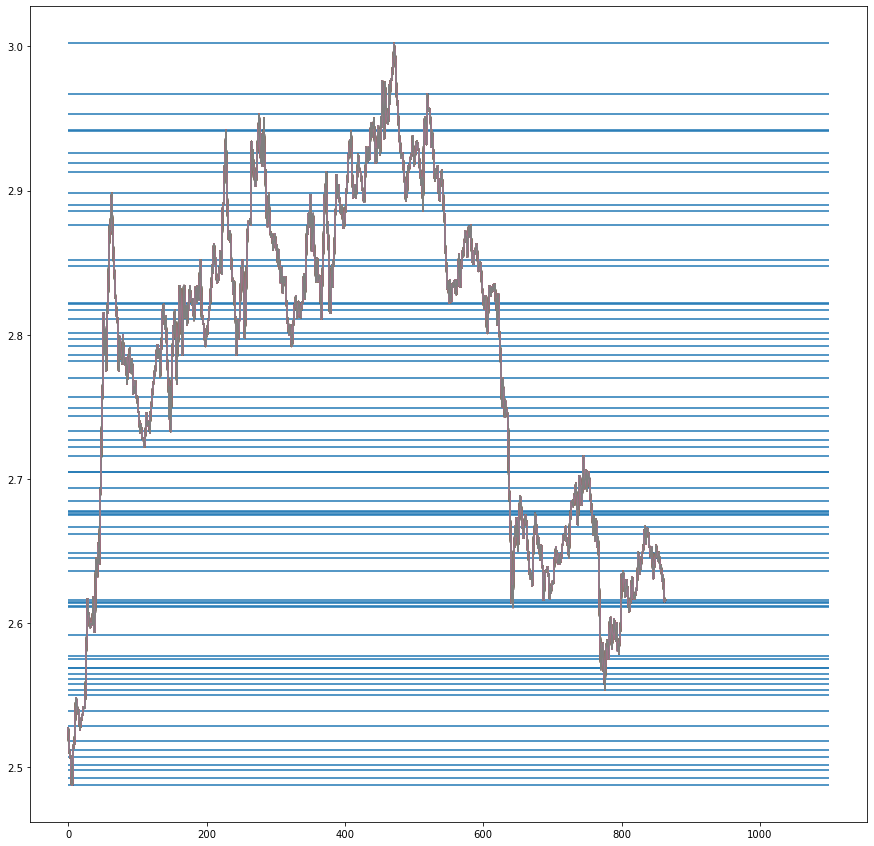

In [24]:
_klines_all_ = bot.klines(
                symbol=_SYMBOL_,
                limit=1440*3,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(1440*3),
                endTime=TimestampNow,
  )
_klines_all_ = klines_parsing(_klines_all_)
_klines_all_ = pd.DataFrame(_klines_all_)
plt.figure(figsize=(15, 15))
for i in set(close_max):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
for i in set(close_min):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
plt.show()

In [25]:
close_max_min = close_max+close_min
counter_max_min = Counter(close_max_min)
#print(counter_max_min)
print(close_max_min)

[2.667, 2.636, 2.716, 2.676, 2.797, 2.876, 2.926, 2.967, 3.002, 2.941, 2.913, 2.898, 2.953, 2.942, 2.852, 2.821, 2.898, 2.694, 2.565, 2.558, 2.612, 2.569, 2.677, 2.749, 2.757, 2.705, 2.727, 2.77, 2.89, 2.817, 2.782, 2.577, 2.592, 2.561, 2.649, 2.575, 2.615, 2.554, 2.645, 2.616, 2.611, 2.801, 2.822, 2.886, 2.919, 2.848, 2.811, 2.792, 2.786, 2.792, 2.733, 2.722, 2.722, 2.488, 2.512, 2.498, 2.55, 2.502, 2.529, 2.614, 2.685, 2.662, 2.675, 2.678, 2.744, 2.705, 2.569, 2.518, 2.539, 2.507, 2.539, 2.493]


In [26]:
df=pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода', 'Время выхода', 'Правильный Неправильный'])
df

Empty DataFrame
Columns: [Монета, Тип операции, bids or asks, Цена входа, Время входа, Цена выхода, Время выхода, Правильный Неправильный]
Index: []

In [27]:
def profit_calculate(reduced, deductible, profit, lots, commission):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*commission*lots+float(deductible)*commission*lots)
    return profit
 
def start_sum_calculate(reduced, deductible, start_sum, lots, commission):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*commission*lots+float(deductible)*commission*lots)+start_sum
    return start_sum
 
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum):#Пробой asks и отcкок bids
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
    profit = profit_calculate(end, start, profit, lots, commission)
    start_sum = start_sum_calculate(end, start, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer
    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum): #Пробой bids и отcкок asks
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            false_answer+=1
            break
    
    profit = profit_calculate(start, end, profit, lots, commission)
    start_sum = start_sum_calculate(start, end, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer

In [ ]:
i=0
profit=0
start_sum=700
#lots=10
how_more_mean_vol=3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

while True:
    try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a:
                asks.append(f[0])

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        last = last_price['lastPrice']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        
        if float(last_price['lastPrice']) == nearest_close_max and nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
            profit, start_sum, right_answer, false_answer=main_algorithm_1('пробой', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_close_min and nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
            profit, start_sum, right_answer, false_answer=main_algorithm_2('пробой', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_bids:
            profit, start_sum, right_answer, false_answer=main_algorithm_1('отскок', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)
            set(bids).remove(nearest_bids)            

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_asks:
            profit, start_sum, right_answer, false_answer=main_algorithm_2('отскок', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)
            set(asks).remove(nearest_asks)

        if i%15==0:
            list(bids).clear()
            list(asks).clear()
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
    except Exception as err:
        print('Ошибка:', err)

Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 267.5840978593272
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 267.5840978593272
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 267.5840978593272
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 267.5840978593272
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 267.5840978593272
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 267.5840978593272
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 267.17557251908397
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 700 Кол-во торгуемых лотов: 267.0736360167875
Заработали: 0
Правильны

Заработали: 1.3717228778074382
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 701.3717228778074 Кол-во торгуемых лотов: 266.47861811466845
Заработали: 1.3717228778074382
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 701.3717228778074 Кол-во торгуемых лотов: 266.3774108916853
Заработали: 1.3717228778074382
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 701.3717228778074 Кол-во торгуемых лотов: 266.3774108916853
Заработали: 1.3717228778074382
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 701.3717228778074 Кол-во торгуемых лотов: 266.3774108916853
Заработали: 1.3717228778074382
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 701.3717228778074 Кол-во торгуемых лотов: 266.47861811466845
Заработали: 1.3717228778074382
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 701.3717228778074 Кол-во торгуемых лотов: 266.47861811466845
Заработали: 1.3717228778074382
Правильных ответов: 1 Неправильных ответов: 0
Ко

Заработали: 0.3460821200596399
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 700.3460821200596 Кол-во торгуемых лотов: 266.08893697570653
Заработали: 0.3460821200596399
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 700.3460821200596 Кол-во торгуемых лотов: 266.08893697570653
Заработали: 0.3460821200596399
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 700.3460821200596 Кол-во торгуемых лотов: 266.08893697570653
Заработали: 0.3460821200596399
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 700.3460821200596 Кол-во торгуемых лотов: 266.08893697570653
Заработали: 0.3460821200596399
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 700.3460821200596 Кол-во торгуемых лотов: 266.19007302168745
Заработали: 0.3460821200596399
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 700.3460821200596 Кол-во торгуемых лотов: 266.19007302168745
Заработали: 0.3460821200596399
Правильных ответов: 1 Неправильных ответов: 1

Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.3057690970294
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.3057690970294
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.3057690970294
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.3057690970294
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.6103506095307
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.6103506095307
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 

Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 

Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.5087460551826
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.5087460551826
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.5087460551826
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.5087460551826
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.7120326654459
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.7120326654459
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 

Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.4072189138283
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 

Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.81379231163646
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.81379231163646
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.81379231163646
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.81379231163646
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.6103506095307
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.6103506095307
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответ

Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.2216085780662
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.2216085780662
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.2216085780662
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.2216085780662
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.42598456933047
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.42598456933047
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов

Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.83567585170397
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.83567585170397
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.6306734208952
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.6306734208952
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.6306734208952
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 267.6306734208952
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов

Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.6103506095307
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.6103506095307
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.7120326654459
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.7120326654459
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.7120326654459
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 2
Конечеая сумма: 699.3189496487992 Кол-во торгуемых лотов: 266.7120326654459
Заработали: -0.6810503512007614
Правильных ответов: 1 Неправильных ответов: 

Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 266.220278597078
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 266.220278597078
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 266.220278597078
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 266.220278597078
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 266.220278597078
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 266.220278597078
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая су

Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 263.4179598750035
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 263.5170264262916
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 263.2200500629261
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 263.9140388954837
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 263.81467366999595
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 263.71538323955934
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Кон

Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.81170569444794
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.81170569444794
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.81170569444794
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.81170569444794
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.81170569444794
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.81170569444794
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2

Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.0134790005687
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.0134790005687
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 263.9140388954837
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 263.9140388954837
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 263.9140388954837
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.3122494407806
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конеч

Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.81170569444794
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.71166349358117
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 264.9118235415914
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 265.0120171208431
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 265.0120171208431
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 265.0120171208431
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Кон

Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 265.8163024535316
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 265.8163024535316
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 265.8163024535316
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 265.8163024535316
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 265.8163024535316
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конечеая сумма: 700.6917732675092 Кол-во торгуемых лотов: 265.8163024535316
Заработали: 0.6917732675093593
Правильных ответов: 2 Неправильных ответов: 2
Конеч

Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.1500595287192
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.1500595287192
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.1500595287192
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.1500595287192
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.1500595287192
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.1500595287192
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая су

Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 265.8473869818708
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 265.8473869818708
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 265.8473869818708
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 265.8473869818708
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 265.8473869818708
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 265.8473869818708
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая су

Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.65604823504754
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.65604823504754
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.65604823504754
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.65604823504754
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.8589828227454
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.8589828227454
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеа

Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.65604823504754
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.8589828227454
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.8589828227454
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.9605659909308
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 266.9605659909308
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.0622265263424
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая с

Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.5716928112076
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.5716928112076
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.5716928112076
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.5716928112076
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.5716928112076
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.5716928112076
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая су

Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.0622265263424
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.0622265263424
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.0622265263424
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.0622265263424
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.0622265263424
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.0622265263424
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая су

Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.3676732208063
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.3676732208063
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.26578005265816
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.26578005265816
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.26578005265816
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 267.4696441106694
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая

Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.4936473423335
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.4936473423335
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.4936473423335
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.4936473423335
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.69938960083334
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.69938960083334
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая 

Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.39089432000577
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.59647907245306
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.69938960083334
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.69938960083334
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.69938960083334
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.69938960083334
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конеч

Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.69938960083334
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.69938960083334
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 268.80237901808164
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 269.11182151119533
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 269.11182151119533
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 701.305406858175 Кол-во торгуемых лотов: 269.11182151119533
Заработали: 1.3054068581751985
Правильных ответов: 3 Неправильных ответов: 3
Конеч

Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 267.890229860021
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 267.890229860021
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 267.890229860021
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 267.890229860021
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 267.890229860021
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 267.890229860021
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Коне

Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.36001148686785
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.1573021934988
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.1573021934988
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.05606320445605
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.36001148686785
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.36001148686785
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответ

Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.85381610205815
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.85381610205815
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.85381610205815
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.651876249341
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.651876249341
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.450242946685
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 

Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.14836624886846
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.3495410335792
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.450242946685
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.450242946685
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.450242946685
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.450242946685
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
К

Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.85381610205815
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.85381610205815
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.85381610205815
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.85381610205815
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.85381610205815
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 265.85381610205815
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных отв

Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.86813817799117
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.86813817799117
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.86813817799117
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.86813817799117
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.86813817799117
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных ответов: 4
Конечеая сумма: 699.4613901645149 Кол-во торгуемых лотов: 266.86813817799117
Заработали: -0.5386098354849524
Правильных ответов: 3 Неправильных отв

Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 268.2139600519159
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 268.111353334222
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 268.111353334222
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 268.111353334222
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 268.111353334222
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 268.111353334222
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая с

Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 267.59949508043377
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 267.59949508043377
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 267.59949508043377
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 267.59949508043377
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 267.59949508043377
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 700.8430776156562 Кол-во торгуемых лотов: 267.59949508043377
Заработали: 0.8430776156563241
Правильных ответов: 4 Неправильных ответов: 4

Заработали: -0.18508881485608297
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 699.8149111851437 Кол-во торгуемых лотов: 266.08931984226
Заработали: -0.18508881485608297
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 699.8149111851437 Кол-во торгуемых лотов: 266.08931984226
Заработали: -0.18508881485608297
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 699.8149111851437 Кол-во торгуемых лотов: 266.08931984226
Заработали: -0.18508881485608297
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 699.8149111851437 Кол-во торгуемых лотов: 266.08931984226
Заработали: -0.18508881485608297
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 699.8149111851437 Кол-во торгуемых лотов: 266.08931984226
Заработали: -0.18508881485608297
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 699.8149111851437 Кол-во торгуемых лотов: 266.08931984226
Заработали: -0.18508881485608297
Правильных ответов: 4 Неправильных ответов: 5
Кон

Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 266.7131044221153
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 266.7131044221153
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 266.81455482318876
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 266.91608243156895
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 266.91608243156895
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 267.01768733542565
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая

Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 267.11936962306294
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 267.11936962306294
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 267.11936962306294
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 267.11936962306294
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 267.11936962306294
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 701.4554646301632 Кол-во торгуемых лотов: 267.11936962306294
Заработали: 1.455464630163377
Правильных ответов: 5 Неправильных ответов: 5
Конече

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 267.64468112894343
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 267.64468112894343
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 267.64468112894343
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 267.64468112894343
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 267.64468112894343
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 267.8486785993161
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеа

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 268.360035374038
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 268.360035374038
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 268.360035374038
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 268.360035374038
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 268.1552585442982
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 268.1552585442982
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 268.7705287359868
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 268.4625411171144
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 268.1552585442982
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 267.8486785993161
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 267.4409941570036
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 267.4409941570036
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сум

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.4271920563327
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.4271920563327
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.4271920563327
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.3262344238748
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.3262344238748
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.3262344238748
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сум

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.7220917370909
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.7220917370909
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.7220917370909
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.7220917370909
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.7220917370909
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.6216676661397
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сум

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.82259177178724
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.52131947283925
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.52131947283925
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.52131947283925
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.3208503754645
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.22072929985114
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеа

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.0238200774434
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.9231678564531
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.9231678564531
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.9231678564531
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.9231678564531
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.9231678564531
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сум

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.5282262588568
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.4271920563327
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.4271920563327
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.4271920563327
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.4271920563327
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 266.4271920563327
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сум

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.52131947283925
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.52131947283925
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.52131947283925
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.52131947283925
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.52131947283925
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.52131947283925
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конече

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.92081893878833
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.92081893878833
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.92081893878833
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.92081893878833
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.82099948930124
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.82099948930124
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конече

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.6215860860713
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.6215860860713
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.6215860860713
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.6215860860713
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.32302844851654
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.32302844851654
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая с

Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.02071366689495
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 265.02071366689495
Заработали: 2.834932644605667
Правильных ответов: 6 Неправильных ответов: 5
Конечеая сумма: 702.8349326446055 Кол-во торгуемых лотов: 264.52199196259147
Работаем на отскок buy asks 2.66500000
Закрылись по стопу sell asks 2.66800000
Заработали: 1.8147537465393047
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 701.8147537465392 Кол-во торгуемых лотов: 264.0251437432778
Заработали: 1.8147537465393047
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 701.8147537465392 Кол-во торгуемых лотов: 263.0490081508767
Заработали: 1.8147537465393047
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 701.8147537465392 Кол-во торгуемых лотов: 263.1476392000522
Зар

Заработали: 1.8147537465393047
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 701.8147537465392 Кол-во торгуемых лотов: 263.8401329874207
Заработали: 1.8147537465393047
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 701.8147537465392 Кол-во торгуемых лотов: 263.6419059904355
Заработали: 1.8147537465393047
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 701.8147537465392 Кол-во торгуемых лотов: 263.6419059904355
Заработали: 1.8147537465393047
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 701.8147537465392 Кол-во торгуемых лотов: 263.4439766315838
Заработали: 1.8147537465393047
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 701.8147537465392 Кол-во торгуемых лотов: 263.34512335705034
Заработали: 1.8147537465393047
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 701.8147537465392 Кол-во торгуемых лотов: 263.34512335705034
Заработали: 1.8147537465393047
Правильных ответов: 6 Неправильных ответов: 6
Кон

Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.4502184554794
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.4502184554794
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.5497106369901
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.3508010801201
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.3508010801201
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.3508010801201
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конеч

Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.8548333482625
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.8548333482625
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.8548333482625
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.8548333482625
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.8548333482625
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.8548333482625
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конеч

Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.9538779553752
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.9538779553752
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.9538779553752
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.9538779553752
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.9538779553752
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.9538779553752
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конеч

Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.7489197564456
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.7489197564456
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.7489197564456
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.7489197564456
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.7489197564456
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 264.6492777091154
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конеч

Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.8548333482625
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.8548333482625
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.8548333482625
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.6569669565503
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.9538779553752
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 703.1731308731196 Кол-во торгуемых лотов: 263.9538779553752
Заработали: 3.1731308731196926
Правильных ответов: 7 Неправильных ответов: 6
Конеч

Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.66074674202224
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.4620524877114
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.4620524877114
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.4620524877114
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.4620524877114
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.4620524877114
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая су

Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.56136230839775
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.56136230839775
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.56136230839775
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.56136230839775
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.56136230839775
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 264.56136230839775
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конече

Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 266.0600105087852
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 265.75892411439577
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 265.75892411439577
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 265.6587133586965
Заработали: 4.526907827263248
Правильных ответов: 8 Неправильных ответов: 6
Конечеая сумма: 704.5269078272631 Кол-во торгуемых лотов: 265.45851839761235
Работаем на отскок buy asks 2.65800000
Закрылись по стопу sell asks 2.66100000
Заработали: 3.5033351935669326
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 703.5033351935668 Кол-во торгуемых лотов: 265.0590322901667
Зараб

Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 264.98674750963033
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 264.98674750963033
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 265.0867802568971
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 265.0867802568971
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 265.0867802568971
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 265.0867802568971
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Кон

Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 264.98674750963033
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 264.98674750963033
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 264.98674750963033
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 264.78690833352954
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 264.98674750963033
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 264.98674750963033
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8

Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 266.6976380176682
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 266.9003728242191
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 266.9003728242191
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 266.9003728242191
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 266.7989669074925
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 702.2148809005204 Кол-во торгуемых лотов: 266.7989669074925
Заработали: 2.2148809005204977
Правильных ответов: 8 Неправильных ответов: 8
Конеч

Заработали: 1.1892625521642273
Правильных ответов: 8 Неправильных ответов: 9
Конечеая сумма: 701.1892625521641 Кол-во торгуемых лотов: 265.09991022766127
Заработали: 1.1892625521642273
Правильных ответов: 8 Неправильных ответов: 9
Конечеая сумма: 701.1892625521641 Кол-во торгуемых лотов: 265.09991022766127
Заработали: 1.1892625521642273
Правильных ответов: 8 Неправильных ответов: 9
Конечеая сумма: 701.1892625521641 Кол-во торгуемых лотов: 265.30051553241174
Заработали: 1.1892625521642273
Правильных ответов: 8 Неправильных ответов: 9
Конечеая сумма: 701.1892625521641 Кол-во торгуемых лотов: 264.9997212971142
Заработали: 1.1892625521642273
Правильных ответов: 8 Неправильных ответов: 9
Конечеая сумма: 701.1892625521641 Кол-во торгуемых лотов: 265.30051553241174
Заработали: 1.1892625521642273
Правильных ответов: 8 Неправильных ответов: 9
Конечеая сумма: 701.1892625521641 Кол-во торгуемых лотов: 265.30051553241174
Заработали: 1.1892625521642273
Правильных ответов: 8 Неправильных ответов: 9


Заработали: 0.16784976200024487
Правильных ответов: 8 Неправильных ответов: 10
Конечеая сумма: 700.1678497620002 Кол-во торгуемых лотов: 264.0150263054299
Заработали: 0.16784976200024487
Правильных ответов: 8 Неправильных ответов: 10
Конечеая сумма: 700.1678497620002 Кол-во торгуемых лотов: 264.0150263054299
Работаем на отскок buy bids 2.64700000
Закрылись по стопу sell bids 2.64300000
Заработали: -1.1168881461739384
Правильных ответов: 8 Неправильных ответов: 11
Конечеая сумма: 698.883111853826 Кол-во торгуемых лотов: 264.4279651357647
Заработали: -1.1168881461739384
Правильных ответов: 8 Неправильных ответов: 11
Конечеая сумма: 698.883111853826 Кол-во торгуемых лотов: 264.6282135001234
Заработали: -1.1168881461739384
Правильных ответов: 8 Неправильных ответов: 11
Конечеая сумма: 698.883111853826 Кол-во торгуемых лотов: 264.6282135001234
Заработали: -1.1168881461739384
Правильных ответов: 8 Неправильных ответов: 11
Конечеая сумма: 698.883111853826 Кол-во торгуемых лотов: 264.628213500

Заработали: -1.1168881461739384
Правильных ответов: 8 Неправильных ответов: 11
Конечеая сумма: 698.883111853826 Кол-во торгуемых лотов: 265.13016382922075
Заработали: -1.1168881461739384
Правильных ответов: 8 Неправильных ответов: 11
Конечеая сумма: 698.883111853826 Кол-во торгуемых лотов: 265.13016382922075
Заработали: -1.1168881461739384
Правильных ответов: 8 Неправильных ответов: 11
Конечеая сумма: 698.883111853826 Кол-во торгуемых лотов: 265.13016382922075
Заработали: -1.1168881461739384
Правильных ответов: 8 Неправильных ответов: 11
Конечеая сумма: 698.883111853826 Кол-во торгуемых лотов: 265.13016382922075
Заработали: -1.1168881461739384
Правильных ответов: 8 Неправильных ответов: 11
Конечеая сумма: 698.883111853826 Кол-во торгуемых лотов: 265.13016382922075
Заработали: -1.1168881461739384
Правильных ответов: 8 Неправильных ответов: 11
Конечеая сумма: 698.883111853826 Кол-во торгуемых лотов: 265.13016382922075
Заработали: -1.1168881461739384
Правильных ответов: 8 Неправильных отв

Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.04375369656054
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.943129644284
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.04375369656054
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.34608497454144
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.14445421088294
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.14445421088294
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12


Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.14445421088294
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.8425819669996
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.8425819669996
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.8425819669996
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.8425819669996
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.8425819669996
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Кон

Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.2452312744371
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.2452312744371
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.2452312744371
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.2452312744371
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.2452312744371
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.2452312744371
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Коне

Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.1408794409705
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.240894919744
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.240894919744
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.240894919744
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.240894919744
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.240894919744
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая 

Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.1408794409705
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.1408794409705
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.1408794409705
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.54139631654436
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.4411532713316
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.54139631654436
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Ко

Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.240894919744
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.240894919744
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.240894919744
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.1408794409705
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.1408794409705
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 264.1408794409705
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеа

Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.04375369656054
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.04375369656054
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.04375369656054
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.04375369656054
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.04375369656054
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 12
Конечеая сумма: 697.860203483044 Кол-во торгуемых лотов: 265.04375369656054
Заработали: -2.139796516955983
Правильных ответов: 8 Неправильных ответов: 1

Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 266.67423885492474
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 266.67423885492474
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 266.67423885492474
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 267.18315915808296
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 267.2851764009841
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 267.18315915808296
Заработали: 0.019876994177423918
Правильных ответов: 9 Непр

Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 267.89891963037786
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 267.69402561918827
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 267.7964334331207
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 267.7964334331207
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 267.7964334331207
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 268.10412753511196
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправ

Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 268.0014843009867
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 268.0014843009867
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 268.10412753511196
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 268.10412753511196
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 268.10412753511196
Заработали: 0.019876994177423918
Правильных ответов: 9 Неправильных ответов: 12
Конечеая сумма: 700.0198769941774 Кол-во торгуемых лотов: 268.10412753511196
Заработали: 0.019876994177423918
Правильных ответов: 9 Непра

Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.6701900556876
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.6701900556876
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.1507944662121
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.1507944662121
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.1507944662121
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.1507944662121
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 1

Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.5661506305118
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.25451346215283
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.25451346215283
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.462191451711
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.462191451711
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.462191451711
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13

Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.8785100171057
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.7743098201879
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.8785100171057
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.8785100171057
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.5661506305118
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 13
Конечеая сумма: 698.7154624342867 Кол-во торгуемых лотов: 269.5661506305118
Заработали: -1.284537565713276
Правильных ответов: 9 Неправильных ответов: 1

Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.4257097760739
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.4257097760739
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.4257097760739
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.4257097760739
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.5285658182955
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.4257097760739
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 1

Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.4257097760739
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.4257097760739
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.4257097760739
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.4257097760739
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.4257097760739
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 267.4257097760739
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 1

Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.66522639149025
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.7690383027698
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.7690383027698
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.7690383027698
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.7690383027698
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.7690383027698
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 

Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.66522639149025
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.66522639149025
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.66522639149025
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.66522639149025
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.66522639149025
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 268.66522639149025
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных отве

Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 269.1850894456534
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 269.28930357242285
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 269.08095594876914
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 269.28930357242285
Заработали: -4.425728872431597
Правильных ответов: 9 Неправильных ответов: 15
Конечеая сумма: 695.5742711275683 Кол-во торгуемых лотов: 269.28930357242285
Работаем на отскок buy bids 2.57900000
Закрылись по стопу sell bids 2.57600000
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 269.61968794

Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.8890112852044
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.8890112852044
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.8890112852044
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.8890112852044
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.8890112852044
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.8890112852044
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Коне

Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 269.2016729262337
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.99315110367274
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.99315110367274
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.99315110367274
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.99315110367274
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.99315110367274
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16

Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.1622842276769
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.1622842276769
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.1622842276769
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 268.1622842276769
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 267.9553688849086
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 267.9553688849086
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Коне

Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 267.645593891978
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 267.645593891978
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 267.645593891978
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 267.645593891978
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 267.645593891978
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 267.5424946647469
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая 

Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 269.41051828924867
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 269.41051828924867
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 269.41051828924867
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 269.41051828924867
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 269.41051828924867
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 269.41051828924867
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 1

Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.039003168617
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.039003168617
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.039003168617
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.039003168617
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.14403584196145
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.3543464965679
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеа

Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 271.4108308517714
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 271.5169336003452
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 271.5169336003452
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 271.5169336003452
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 271.5169336003452
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 271.62311933894523
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Кон

Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.5649848654784
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.8815585607188
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.8815585607188
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.8815585607188
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.8815585607188
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Конечеая сумма: 694.540316149683 Кол-во торгуемых лотов: 270.6704271822615
Заработали: -5.459683850316937
Правильных ответов: 9 Неправильных ответов: 16
Коне

Заработали: -4.05471217904388
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 695.9452878209561 Кол-во торгуемых лотов: 272.49228184062497
Заработали: -4.05471217904388
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 695.9452878209561 Кол-во торгуемых лотов: 273.1339434148179
Заработали: -4.05471217904388
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 695.9452878209561 Кол-во торгуемых лотов: 273.2411809269557
Заработали: -4.05471217904388
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 695.9452878209561 Кол-во торгуемых лотов: 273.4559087705132
Работаем на отскок buy bids 2.54600000
Закрылись по стопу sell bids 2.54300000
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.2594005585926
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.0446583970

Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.1519872722095
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.1519872722095
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.1519872722095
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.1519872722095
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.1519872722095
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.1519872722095
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 

Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 272.6161850217737
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 272.7231772450946
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 272.7231772450946
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 272.7231772450946
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 272.50927671392196
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 272.40245222285415
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов

Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 271.9759904581217
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 271.9759904581217
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 271.9759904581217
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 271.9759904581217
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 271.9759904581217
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 271.9759904581217
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 

Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 272.18905429710185
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 272.18905429710185
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 272.18905429710185
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 272.18905429710185
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 272.18905429710185
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 271.86958357609586
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных отв

Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.04465839705347
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.04465839705347
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.04465839705347
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.04465839705347
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.04465839705347
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.04465839705347
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных отв

Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.6898998111465
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.6898998111465
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.6898998111465
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.79773665110366
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.79773665110366
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 273.79773665110366
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответо

Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 274.3381980341496
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 274.5549804901229
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 274.66350024525735
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 274.7721058206805
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 274.5549804901229
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов: 17
Конечеая сумма: 694.898655620501 Кол-во торгуемых лотов: 274.66350024525735
Заработали: -5.101344379498973
Правильных ответов: 10 Неправильных ответов

Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 274.1381661360384
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 273.92154174557135
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 273.8133578823227
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 273.59724631335484
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 273.59724631335484
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 273.4893184055389
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных 

Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.7362006915976
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.52178543948156
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.7362006915976
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.7362006915976
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.7362006915976
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.6289509076056
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных от

Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.52178543948156
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.52178543948156
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.52178543948156
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.52178543948156
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.52178543948156
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 272.52178543948156
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильн

Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 271.34850182310805
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 271.34850182310805
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 271.45474634222444
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 271.56107409245635
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 271.56107409245635
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 271.45474634222444
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильн

Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.39603048285534
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.29061292711157
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.29061292711157
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.08002421427386
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.08002421427386
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.29061292711157
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильн

Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.1852775362592
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.1852775362592
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.08002421427386
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.08002421427386
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.08002421427386
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных ответов: 18
Конечеая сумма: 693.2954221580411 Кол-во торгуемых лотов: 270.29061292711157
Заработали: -6.704577841958868
Правильных ответов: 10 Неправильных

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.2611561466392
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.36749137053044
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.154904224921
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.154904224921
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.154904224921
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.154904224921
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
К

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.94264989676054
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.94264989676054
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.94264989676054
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.94264989676054
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.47390999459736
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.47390999459736
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных отве

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.8366472950795
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.8366472950795
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.8366472950795
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.8366472950795
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.8366472950795
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.8366472950795
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 1

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.0487355075267
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.8366472950795
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.154904224921
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.154904224921
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.154904224921
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.154904224921
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Ко

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.900420458061
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответо

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.7574745808602
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.7574745808602
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.7574745808602
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.7574745808602
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.864986395831
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.864986395831
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19


Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.54270491583594
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.54270491583594
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.54270491583594
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.54270491583594
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.54270491583594
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.54270491583594
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных отве

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.900420458061
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.900420458061
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.114178650245
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 1

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.65004745420373
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.65004745420373
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.65004745420373
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.65004745420373
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.65004745420373
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.65004745420373
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных отве

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 273.61994880878393
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 273.61994880878393
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 273.1880309732531
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 273.1880309732531
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 273.1880309732531
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 273.2958825448967
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов:

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.32827320465117
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.32827320465117
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.32827320465117
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.22118383256907
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.22118383256907
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.22118383256907
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных отве

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.54270491583594
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.54270491583594
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.54270491583594
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.7574745808602
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.7574745808602
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.7574745808602
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.6869978360374
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 272.00725755843746
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответ

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.62489072956345
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.51913657140415
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 270.8366472950795
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.2611561466392
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.36749137053044
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.47390999459736
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответо

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.36749137053044
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.6869978360374
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.6869978360374
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.6869978360374
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.47390999459736
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 271.47390999459736
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов

Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 269.8863432694828
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 269.9916031537532
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 269.9916031537532
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 269.9916031537532
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 269.9916031537532
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 19
Конечеая сумма: 692.2584704862232 Кол-во торгуемых лотов: 269.9916031537532
Заработали: -7.74152951377676
Правильных ответов: 10 Неправильных ответов: 1

Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.6460263636518
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.6460263636518
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.6460263636518
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.6460263636518
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.6460263636518
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.4373692557965
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 

Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.12499062594105
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.12499062594105
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.12499062594105
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.12499062594105
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.6460263636518
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.6460263636518
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответ

Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.12499062594105
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.12499062594105
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.12499062594105
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.12499062594105
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 267.8133381765502
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 267.9171417959985
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответ

Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 267.8133381765502
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 267.8133381765502
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 267.8133381765502
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 267.8133381765502
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 267.8133381765502
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 267.8133381765502
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 

Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.22903602393325
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.12499062594105
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.12499062594105
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 267.8133381765502
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.33316220251396
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных ответов: 20
Конечеая сумма: 691.226225833676 Кол-во торгуемых лотов: 268.33316220251396
Заработали: -8.773774166323987
Правильных ответов: 10 Неправильных отве

Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.39498645300887
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.39498645300887
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.39498645300887
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.39498645300887
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.4998094049361
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.4998094049361
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных

Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.18558498666374
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.2902450119307
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.39498645300887
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.39498645300887
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.39498645300887
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.2902450119307
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных

Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 268.9765088041498
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 268.9765088041498
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 268.9765088041498
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 268.9765088041498
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.39498645300887
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.39498645300887
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных о

Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.2902450119307
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.2902450119307
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.4998094049361
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.4998094049361
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.4998094049361
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных ответов: 20
Конечеая сумма: 692.6145101706858 Кол-во торгуемых лотов: 269.4998094049361
Заработали: -7.385489829314274
Правильных ответов: 11 Неправильных отв

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.20330361040084
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.20330361040084
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.20330361040084
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.20330361040084
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.3093252302642
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.3093252302642
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.94719981936356
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.94719981936356
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.94719981936356
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.94719981936356
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.94719981936356
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.94719981936356
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильн

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.94719981936356
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.94719981936356
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.94719981936356
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.94719981936356
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.73424194949723
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.73424194949723
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильн

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.84067917705283
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.73424194949723
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.73424194949723
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.73424194949723
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.73424194949723
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.73424194949723
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильн

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.84067917705283
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.84067917705283
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.84067917705283
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.73424194949723
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.73424194949723
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 271.73424194949723
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильн

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.6951881882184
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.6951881882184
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.6951881882184
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.6951881882184
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.6951881882184
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.6951881882184
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных отв

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.6951881882184
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.6951881882184
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.9096555009893
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.9096555009893
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.9096555009893
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 272.9096555009893
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных отв

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 273.1244604246422
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 273.1244604246422
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 273.1244604246422
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 273.1244604246422
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 273.1244604246422
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 273.1244604246422
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных отв

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 274.09528196643595
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 274.09528196643595
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 274.52897703283855
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 274.52897703283855
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 274.52897703283855
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 274.52897703283855
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильн

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.07302970234474
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.07302970234474
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.07302970234474
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.07302970234474
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.2912550333264
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.2912550333264
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.9480134946385
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.9480134946385
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.9480134946385
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.9480134946385
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.6192430258204
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 275.6192430258204
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных отв

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 276.1676299001257
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 276.1676299001257
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 276.1676299001257
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 276.1676299001257
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 276.6079130884878
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 276.6079130884878
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных отв

Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 279.9553263166663
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 280.63455476709095
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 281.08920775172777
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 280.9754064530428
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 281.4311654253916
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных ответов: 20
Конечеая сумма: 694.0092539390158 Кол-во торгуемых лотов: 281.7739561262752
Заработали: -5.990746060984275
Правильных ответов: 12 Неправильных о

Заработали: -4.755069137805816
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 695.2449308621942 Кол-во торгуемых лотов: 281.13422194184966
Заработали: -4.755069137805816
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 695.2449308621942 Кол-во торгуемых лотов: 281.36176886369657
Заработали: -4.755069137805816
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 695.2449308621942 Кол-во торгуемых лотов: 281.36176886369657
Заработали: -4.755069137805816
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 695.2449308621942 Кол-во торгуемых лотов: 281.4756805110098
Заработали: -4.755069137805816
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 695.2449308621942 Кол-во торгуемых лотов: 281.2479493779103
Заработали: -4.755069137805816
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 695.2449308621942 Кол-во торгуемых лотов: 281.81796954284323
Заработали: -4.755069137805816
Правильных ответов: 13 Неправильных

Закрылись по тейку sell bids 2.44200000
Заработали: -4.338610540250764
Правильных ответов: 14 Неправильных ответов: 22
Конечеая сумма: 695.6613894597493 Кол-во торгуемых лотов: 284.7570157428364
Заработали: -4.338610540250764
Правильных ответов: 14 Неправильных ответов: 22
Конечеая сумма: 695.6613894597493 Кол-во торгуемых лотов: 285.2240219187164
Заработали: -4.338610540250764
Правильных ответов: 14 Неправильных ответов: 22
Конечеая сумма: 695.6613894597493 Кол-во торгуемых лотов: 284.6405030522706
Заработали: -4.338610540250764
Правильных ответов: 14 Неправильных ответов: 22
Конечеая сумма: 695.6613894597493 Кол-во торгуемых лотов: 284.17540419107405
Заработали: -4.338610540250764
Правильных ответов: 14 Неправильных ответов: 22
Конечеая сумма: 695.6613894597493 Кол-во торгуемых лотов: 284.4077634749588
Заработали: -4.338610540250764
Правильных ответов: 14 Неправильных ответов: 22
Конечеая сумма: 695.6613894597493 Кол-во торгуемых лотов: 284.52408566860913
Заработали: -4.3386105402507

Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 286.4212119449313
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 286.5394700836369
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 286.4212119449313
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 286.3030513789475
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 286.89483114616314
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 286.3030513789475
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных от

Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 281.9986170428967
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 282.5727184619579
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 282.9183027079367
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 282.5727184619579
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 282.6878193656084
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 282.5727184619579
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных отв

Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 284.1927094768913
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.6120132989655
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.96014588484803
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 284.1927094768913
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.49615871836954
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.49615871836954
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных 

Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.03368537625147
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.03368537625147
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.03368537625147
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.03368537625147
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.03368537625147
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.26473328268105
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильн

Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.6120132989655
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.49615871836954
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.84400676587677
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 284.076380082918
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.72796260939026
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных ответов: 23
Конечеая сумма: 693.9985965425686 Кол-во торгуемых лотов: 283.72796260939026
Заработали: -6.001403457431436
Правильных ответов: 14 Неправильных 

Заработали: -7.0796741965413545
Правильных ответов: 14 Неправильных ответов: 24
Конечеая сумма: 692.9203258034587 Кол-во торгуемых лотов: 282.36362094680464
Заработали: -7.0796741965413545
Правильных ответов: 14 Неправильных ответов: 24
Конечеая сумма: 692.9203258034587 Кол-во торгуемых лотов: 282.13368314473075
Заработали: -7.0796741965413545
Правильных ответов: 14 Неправильных ответов: 24
Конечеая сумма: 692.9203258034587 Кол-во торгуемых лотов: 282.47873045391714
Заработали: -7.0796741965413545
Правильных ответов: 14 Неправильных ответов: 24
Конечеая сумма: 692.9203258034587 Кол-во торгуемых лотов: 282.7092312539611
Заработали: -7.0796741965413545
Правильных ответов: 14 Неправильных ответов: 24
Конечеая сумма: 692.9203258034587 Кол-во торгуемых лотов: 282.47873045391714
Заработали: -7.0796741965413545
Правильных ответов: 14 Неправильных ответов: 24
Конечеая сумма: 692.9203258034587 Кол-во торгуемых лотов: 282.47873045391714
Заработали: -7.0796741965413545
Правильных ответов: 14 Непр

Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 281.35838429863315
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 281.2444278853895
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 281.2444278853895
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 281.2444278853895
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 281.2444278853895
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 281.2444278853895
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных от

Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 281.0167917640739
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 280.9031118321305
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 280.9031118321305
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 281.0167917640739
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 280.9031118321305
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 281.0167917640739
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных отв

Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 282.6180270447809
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 282.6180270447809
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 282.7330995313626
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 282.7330995313626
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 282.7330995313626
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных ответов: 24
Конечеая сумма: 694.3924924490266 Кол-во торгуемых лотов: 282.963525855349
Заработали: -5.607507550973501
Правильных ответов: 15 Неправильных отве

Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 283.33377077084424
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 283.33377077084424
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 283.33377077084424
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 283.2184068576639
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 283.2184068576639
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 283.44922870514364
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответо

Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 283.44922870514364
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 283.44922870514364
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 282.9879606356479
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 282.52819140634546
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 282.2988665756585
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 695.5844072424226 Кол-во торгуемых лотов: 282.2988665756585
Заработали: -4.41559275757752
Правильных ответов: 16 Неправильных ответов

Заработали: -5.774113588323958
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 694.2258864116761 Кол-во торгуемых лотов: 283.2418957207981
Заработали: -5.774113588323958
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 694.2258864116761 Кол-во торгуемых лотов: 283.2418957207981
Заработали: -5.774113588323958
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 694.2258864116761 Кол-во торгуемых лотов: 283.35750465782695
Заработали: -5.774113588323958
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 694.2258864116761 Кол-во торгуемых лотов: 283.35750465782695
Заработали: -5.774113588323958
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 694.2258864116761 Кол-во торгуемых лотов: 283.35750465782695
Заработали: -5.774113588323958
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 694.2258864116761 Кол-во торгуемых лотов: 283.35750465782695
Заработали: -5.774113588323958
Правильных ответов: 16 Неправильных

Заработали: -4.58202573265331
Правильных ответов: 17 Неправильных ответов: 25
Конечеая сумма: 695.4179742673467 Кол-во торгуемых лотов: 284.89060805708596
Заработали: -4.58202573265331
Правильных ответов: 17 Неправильных ответов: 25
Конечеая сумма: 695.4179742673467 Кол-во торгуемых лотов: 284.89060805708596
Заработали: -4.58202573265331
Правильных ответов: 17 Неправильных ответов: 25
Конечеая сумма: 695.4179742673467 Кол-во торгуемых лотов: 284.89060805708596
Заработали: -4.58202573265331
Правильных ответов: 17 Неправильных ответов: 25
Конечеая сумма: 695.4179742673467 Кол-во торгуемых лотов: 284.89060805708596
Заработали: -4.58202573265331
Правильных ответов: 17 Неправильных ответов: 25
Конечеая сумма: 695.4179742673467 Кол-во торгуемых лотов: 285.12422069181906
Заработали: -4.58202573265331
Правильных ответов: 17 Неправильных ответов: 25
Конечеая сумма: 695.4179742673467 Кол-во торгуемых лотов: 285.2411707413235
Заработали: -4.58202573265331
Правильных ответов: 17 Неправильных ответ

Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 284.09881269664277
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 283.28743297861894
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 283.40306050228367
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 283.40306050228367
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 283.8665160386733
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 283.51878245430584
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26

Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 282.7107077486136
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 282.7107077486136
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 282.7107077486136
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 283.40306050228367
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 283.40306050228367
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 283.8665160386733
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Ко

Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 284.09881269664277
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 284.09881269664277
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 284.09881269664277
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 284.09881269664277
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 284.09881269664277
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 26
Конечеая сумма: 694.337498230595 Кол-во торгуемых лотов: 284.09881269664277
Заработали: -5.66250176940508
Правильных ответов: 17 Неправильных ответов: 2

Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 283.18930125574275
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 283.18930125574275
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 283.0735247629971
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.9578428975443
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.9578428975443
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.9578428975443
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных 

Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 284.00239605016037
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 284.00239605016037
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 284.00239605016037
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 284.00239605016037
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 283.8859539033583
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 284.00239605016037
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильн

Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 284.5860425689647
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 284.46912143397327
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 284.82017341435255
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 284.82017341435255
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 284.46912143397327
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 283.8859539033583
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильны

Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 281.8062033253118
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 281.5769994185811
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 281.5769994185811
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.1507096863451
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.1507096863451
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.26573239718346
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных о

Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.0357806803629
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.0357806803629
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.0357806803629
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.0357806803629
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.0357806803629
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных ответов: 27
Конечеая сумма: 692.397841570291 Кол-во торгуемых лотов: 282.0357806803629
Заработали: -7.6021584297090685
Правильных ответов: 17 Неправильных от

Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.28683775815
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.6319316918396
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.6319316918396
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.1719936418936
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.1719936418936
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.1719936418936
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27


Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 281.48488651451885
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 281.48488651451885
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 281.48488651451885
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 281.48488651451885
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 281.48488651451885
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 281.48488651451885
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных отве

Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.8624634468901
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.8624634468901
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.8624634468901
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.8624634468901
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.8624634468901
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 282.9778704087207
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 2

Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 283.67229463058266
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 283.67229463058266
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 283.67229463058266
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 283.67229463058266
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 283.55632067529615
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 283.4404415086941
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответ

Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 284.37013545378204
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 284.37013545378204
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 284.48677619843085
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 284.48677619843085
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 284.48677619843085
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных ответов: 27
Конечеая сумма: 693.5787603717745 Кол-во торгуемых лотов: 284.60351266794197
Заработали: -6.42123962822556
Правильных ответов: 18 Неправильных отве

Заработали: -7.499908001897099
Правильных ответов: 18 Неправильных ответов: 28
Конечеая сумма: 692.5000919981029 Кол-во торгуемых лотов: 283.6952445711196
Заработали: -7.499908001897099
Правильных ответов: 18 Неправильных ответов: 28
Конечеая сумма: 692.5000919981029 Кол-во торгуемых лотов: 283.6952445711196
Заработали: -7.499908001897099
Правильных ответов: 18 Неправильных ответов: 28
Конечеая сумма: 692.5000919981029 Кол-во торгуемых лотов: 283.6952445711196
Заработали: -7.499908001897099
Правильных ответов: 18 Неправильных ответов: 28
Конечеая сумма: 692.5000919981029 Кол-во торгуемых лотов: 283.6952445711196
Заработали: -7.499908001897099
Правильных ответов: 18 Неправильных ответов: 28
Конечеая сумма: 692.5000919981029 Кол-во торгуемых лотов: 283.92787699799214
Заработали: -7.499908001897099
Правильных ответов: 18 Неправильных ответов: 28
Конечеая сумма: 692.5000919981029 Кол-во торгуемых лотов: 283.6952445711196
Заработали: -7.499908001897099
Правильных ответов: 18 Неправильных от

Заработали: -7.499908001897099
Правильных ответов: 18 Неправильных ответов: 28
Конечеая сумма: 692.5000919981029 Кол-во торгуемых лотов: 283.92787699799214
Заработали: -7.499908001897099
Правильных ответов: 18 Неправильных ответов: 28
Конечеая сумма: 692.5000919981029 Кол-во торгуемых лотов: 284.1608912589671
Заработали: -7.499908001897099
Правильных ответов: 18 Неправильных ответов: 28
Конечеая сумма: 692.5000919981029 Кол-во торгуемых лотов: 284.3942882949088
Заработали: -7.499908001897099
Правильных ответов: 18 Неправильных ответов: 28
Конечеая сумма: 692.5000919981029 Кол-во торгуемых лотов: 284.1608912589671
Работаем на отскок buy bids 2.43300000
Закрылись по тейку sell bids 2.43900000
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.5359629865154
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.5359

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.0700833909583
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.0700833909583
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.0700833909583
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.0700833909583
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.0700833909583
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.3028323326961
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных отв

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 283.83771522458534
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 283.83771522458534
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 283.95385176927624
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 283.95385176927624
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 283.95385176927624
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.0700833909583
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильны

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 283.83771522458534
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 283.83771522458534
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 283.83771522458534
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 283.83771522458534
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 283.83771522458534
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 283.83771522458534
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильн

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.825046838596
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.06068166698725
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.296705331729
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.4148632786261
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.4148632786261
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных отве

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.06068166698725
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.17864483468503
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.17864483468503
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.17864483468503
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.06068166698725
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.17864483468503
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильн

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 288.19900902164085
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 289.0392393686427
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 289.52157435298756
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 289.52157435298756
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 289.52157435298756
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 290.3695454912599
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 289.1596723850463
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 289.1596723850463
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 289.1596723850463
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 289.1596723850463
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 289.0392393686427
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 289.0392393686427
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных отв

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.8884719818566
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.8884719818566
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.8884719818566
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.1258641804349
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.1258641804349
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.4148632786261
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных отв

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.296705331729
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.17864483468503
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.296705331729
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.296705331729
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.296705331729
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.296705331729
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.4148632786261
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.4148632786261
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.5331187960822
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.4148632786261
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.4148632786261
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.06068166698725
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных от

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.06068166698725
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.06068166698725
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.17864483468503
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.17864483468503
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.17864483468503
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.17864483468503
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильн

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.06068166698725
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.06068166698725
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.06068166698725
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.17864483468503
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.17864483468503
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.4148632786261
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильны

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.60182914385047
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.60182914385047
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.8404038673211
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.48269002655803
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.60182914385047
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.60182914385047
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильны

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.1258641804349
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.1258641804349
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.1258641804349
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.1258641804349
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.1258641804349
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.1258641804349
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных отв

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.296705331729
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.296705331729
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 286.296705331729
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.825046838596
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных отв

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.24470766726455
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.24470766726455
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.3636495752013
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.3636495752013
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.3636495752013
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.3636495752013
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных о

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 288.3187427187832
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 288.3187427187832
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.95983971954814
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 288.07937472980956
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.3636495752013
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 287.3636495752013
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных о

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.9428157083276
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных отв

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.58979988646547
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.58979988646547
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.58979988646547
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.23765463383114
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.23765463383114
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.23765463383114
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильн

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.65267174902016
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.65267174902016
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.65267174902016
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.65267174902016
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.65267174902016
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 284.76947629220814
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильн

Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.3549398536641
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.3549398536641
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.3549398536641
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.3549398536641
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.3549398536641
Заработали: -6.016786275888903
Правильных ответов: 19 Неправильных ответов: 28
Конечеая сумма: 693.9832137241111 Кол-во торгуемых лотов: 285.23765463383114
Работаем на отскок buy bids 2.43000000
Закрылись по стопу sell bids 2

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.22875914820446
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.22875914820446
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.22875914820446
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 285.6393259539124
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 285.6393259539124
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 285.6393259539124
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных 

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 285.6393259539124
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 285.6393259539124
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 285.6393259539124
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 285.6393259539124
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 285.6393259539124
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 285.6393259539124
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных отв

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.22875914820446
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.22875914820446
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.22875914820446
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.22875914820446
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.22875914820446
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.22875914820446
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильн

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.82063003147204
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.82063003147204
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.1769289507658
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.1769289507658
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.82063003147204
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.93929806210156
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.93929806210156
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.93929806210156
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.93929806210156
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.93929806210156
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.93929806210156
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 286.93929806210156
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильн

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.05806432785573
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.05806432785573
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.05806432785573
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.41495375719
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.41495375719
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.41495375719
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответо

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.77273170792506
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.77273170792506
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.77273170792506
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.77273170792506
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.77273170792506
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 287.77273170792506
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильн

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 289.2127954195577
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 289.2127954195577
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 289.2127954195577
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 289.09223985664835
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 289.09223985664835
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 289.2127954195577
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных о

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 290.54557327863404
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 290.54557327863404
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 290.54557327863404
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 290.78921736524086
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 290.66734426492013
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 290.66734426492013
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильн

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 291.7678937383675
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 291.7678937383675
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 291.7678937383675
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 291.8906916734425
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 291.7678937383675
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 291.7678937383675
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных отв

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 295.74937459108713
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 295.74937459108713
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 295.4973512637833
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 295.6233092140236
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 295.6233092140236
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 295.6233092140236
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных о

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 300.7512070321333
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 301.0122757882376
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 301.79820862319383
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 301.9295966112753
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 301.79820862319383
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 301.0122757882376
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных о

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 297.90905645021456
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 298.2934552327309
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 297.7811435878486
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 297.7811435878486
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 297.90905645021456
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 298.1652121307392
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных о

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 297.01596720175564
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 297.01596720175564
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 297.3980632144509
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 297.5256471111538
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 297.5256471111538
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 297.5256471111538
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных о

Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 296.888819955522
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 296.63485176052154
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 296.63485176052154
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 296.63485176052154
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 296.63485176052154
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных ответов: 29
Конечеая сумма: 693.5322834160994 Кол-во торгуемых лотов: 296.63485176052154
Заработали: -6.467716583900576
Правильных ответов: 20 Неправильных

Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 294.64737059741014
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 294.64737059741014
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 294.64737059741014
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 294.64737059741014
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 294.52204206887023
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 294.52204206887023
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильн

Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 293.27459589322905
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 293.15043222011593
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 293.15043222011593
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 293.15043222011593
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 293.27459589322905
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 293.27459589322905
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильн

Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 292.7785712067289
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 292.7785712067289
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 292.7785712067289
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 292.7785712067289
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 292.7785712067289
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных ответов: 30
Конечеая сумма: 692.4213209039139 Кол-во торгуемых лотов: 293.0263736368658
Заработали: -7.578679096086088
Правильных ответов: 20 Неправильных отв

Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.93061245167235
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 293.1781245872462
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 293.30203757312415
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 293.30203757312415
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 293.4260553479965
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 293.55017804484424
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных

Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 293.9231770004285
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 293.9231770004285
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 293.9231770004285
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 293.9231770004285
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 293.9231770004285
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 293.9231770004285
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных отв

Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.43683982217095
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.43683982217095
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.43683982217095
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.43683982217095
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.31365665459634
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.43683982217095
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильн

Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.06760138805214
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.1905772202155
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.06760138805214
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 291.8219600075743
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 291.5767314697529
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 291.45427169173115
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных 

Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 291.20966046916146
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 291.69929419840764
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 291.69929419840764
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 291.69929419840764
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 291.69929419840764
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 291.69929419840764
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильн

Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.43683982217095
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.43683982217095
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.43683982217095
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.31365665459634
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.31365665459634
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.31365665459634
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильн

Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.93061245167235
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.6835178819113
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.6835178819113
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.6835178819113
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.6835178819113
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.6835178819113
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных от

Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.8070130371358
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.8070130371358
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.8070130371358
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.8070130371358
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.8070130371358
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных ответов: 30
Конечеая сумма: 693.9526208980118 Кол-во торгуемых лотов: 292.8070130371358
Заработали: -6.047379101988157
Правильных ответов: 21 Неправильных отв

Заработали: -4.806042167804183
Правильных ответов: 22 Неправильных ответов: 30
Конечеая сумма: 695.1939578321958 Кол-во торгуемых лотов: 292.8365450009249
Заработали: -4.806042167804183
Правильных ответов: 22 Неправильных ответов: 30
Конечеая сумма: 695.1939578321958 Кол-во торгуемых лотов: 292.7132454030298
Заработали: -4.806042167804183
Правильных ответов: 22 Неправильных ответов: 30
Конечеая сумма: 695.1939578321958 Кол-во торгуемых лотов: 292.7132454030298
Работаем на отскок buy asks 2.37800000
Закрылись по стопу sell asks 2.38100000
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.3439688108477
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 291.51261696944846
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 291.5

Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.12606944623604
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.2490698965292
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.49538179698976
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.61869350938315
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.61869350938315
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.2490698965292
Заработали: -5.9084589957431914
Правильных ответов: 22 Непра

Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.61869350938315
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.49538179698976
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.61869350938315
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.61869350938315
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.61869350938315
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.61869350938315
Заработали: -5.9084589957431914
Правильных ответов: 22 Неп

Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.7421092384044
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.7421092384044
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.7421092384044
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.86562911572014
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.9892532732194
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.9892532732194
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправил

Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.86562911572014
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 293.11298184301387
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 293.11298184301387
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 293.11298184301387
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 293.11298184301387
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 293.36075274905187
Заработали: -5.9084589957431914
Правильных ответов: 22 Неп

Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.86562911572014
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.7421092384044
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.7421092384044
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.86562911572014
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.86562911572014
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.49538179698976
Заработали: -5.9084589957431914
Правильных ответов: 22 Непра

Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.49538179698976
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.61869350938315
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.61869350938315
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.61869350938315
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.61869350938315
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 292.37217396977957
Заработали: -5.9084589957431914
Правильных ответов: 22 Неп

Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 291.39023551815984
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 291.39023551815984
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 291.51261696944846
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 291.51261696944846
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 291.6351012622928
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 291.75768852637947
Заработали: -5.9084589957431914
Правильных ответов: 22 Непр

Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.53643407461567
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.29340903565736
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.29340903565736
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.53643407461567
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.53643407461567
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.53643407461567
Заработали: -5.9084589957431914
Правильных ответов: 22 Неп

Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.77986636123035
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.41487071307813
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.41487071307813
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.77986636123035
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.77986636123035
Заработали: -5.9084589957431914
Правильных ответов: 22 Неправильных ответов: 31
Конечеая сумма: 694.0915410042568 Кол-во торгуемых лотов: 290.90173554243785
Заработали: -5.9084589957431914
Правильных ответов: 22 Неп

Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.5639014012749
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.5639014012749
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.5639014012749
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.92985089926134
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.80776535545135
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.80776535545135
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправ

Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.68578223239956
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.68578223239956
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.68578223239956
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.68578223239956
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.4421227334621
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 290.0773984269739
Заработали: -7.0050951579594045
Правильных ответов: 22 Непра

Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 291.7873283545434
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 291.7873283545434
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 291.7873283545434
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 291.7873283545434
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 291.7873283545434
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильных ответов: 32
Конечеая сумма: 692.9949048420406 Кол-во торгуемых лотов: 291.910237928408
Заработали: -7.0050951579594045
Правильных ответов: 22 Неправильн

Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.201102918053
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.07900601955487
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 290.95701146548123
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 290.95701146548123
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 290.83511912720496
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 290.71332887631416
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных

Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.81312709400515
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.81312709400515
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.201102918053
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.201102918053
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.201102918053
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.07900601955487
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных отв

Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 292.4277292993421
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 292.18157801205314
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 292.18157801205314
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 292.18157801205314
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 292.18157801205314
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 292.18157801205314
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильны

Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.3233022898188
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.3233022898188
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.44560426391195
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.44560426391195
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.44560426391195
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных ответов: 32
Конечеая сумма: 694.2234293566382 Кол-во торгуемых лотов: 291.44560426391195
Заработали: -5.776570643361766
Правильных ответов: 23 Неправильных

Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 291.2531929906834
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 291.3755168852616
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 291.3755168852616
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 291.2531929906834
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 291.2531929906834
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 291.2531929906834
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных отв

Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.2346696309216
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.4810732309477
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.6044309168317
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.6044309168317
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.2346696309216
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.1116234542349
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных отв

Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.4810732309477
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.4810732309477
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.4810732309477
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.4810732309477
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.7278927020286
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 693.7651057038079 Кол-во торгуемых лотов: 292.7278927020286
Заработали: -6.234894296192166
Правильных ответов: 24 Неправильных отв

Заработали: -5.001713552072086
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 694.998286447928 Кол-во торгуемых лотов: 292.26168479727835
Заработали: -5.001713552072086
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 694.998286447928 Кол-во торгуемых лотов: 291.6484626302677
Заработали: -5.001713552072086
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 694.998286447928 Кол-во торгуемых лотов: 291.893442439281
Заработали: -5.001713552072086
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 694.998286447928 Кол-во торгуемых лотов: 291.6484626302677
Заработали: -5.001713552072086
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 694.998286447928 Кол-во торгуемых лотов: 291.6484626302677
Заработали: -5.001713552072086
Правильных ответов: 25 Неправильных ответов: 33
Конечеая сумма: 694.998286447928 Кол-во торгуемых лотов: 291.6484626302677
Заработали: -5.001713552072086
Правильных ответов: 25 Неправильных ответов: 

Заработали: -6.692801564046982
Правильных ответов: 25 Неправильных ответов: 34
Конечеая сумма: 693.3071984359531 Кол-во торгуемых лотов: 292.2880263220713
Заработали: -6.692801564046982
Правильных ответов: 25 Неправильных ответов: 34
Конечеая сумма: 693.3071984359531 Кол-во торгуемых лотов: 292.2880263220713
Заработали: -6.692801564046982
Правильных ответов: 25 Неправильных ответов: 34
Конечеая сумма: 693.3071984359531 Кол-во торгуемых лотов: 292.04178535634077
Заработали: -6.692801564046982
Правильных ответов: 25 Неправильных ответов: 34
Конечеая сумма: 693.3071984359531 Кол-во торгуемых лотов: 292.164853955311
Заработали: -6.692801564046982
Правильных ответов: 25 Неправильных ответов: 34
Конечеая сумма: 693.3071984359531 Кол-во торгуемых лотов: 292.04178535634077
Заработали: -6.692801564046982
Правильных ответов: 25 Неправильных ответов: 34
Конечеая сумма: 693.3071984359531 Кол-во торгуемых лотов: 292.04178535634077
Работаем на отскок buy bids 2.37200000
Закрылись по стопу sell bids 

Заработали: -8.08639579898745
Правильных ответов: 25 Неправильных ответов: 35
Конечеая сумма: 691.9136042010126 Кол-во торгуемых лотов: 291.8235361455136
Заработали: -8.08639579898745
Правильных ответов: 25 Неправильных ответов: 35
Конечеая сумма: 691.9136042010126 Кол-во торгуемых лотов: 291.8235361455136
Заработали: -8.08639579898745
Правильных ответов: 25 Неправильных ответов: 35
Конечеая сумма: 691.9136042010126 Кол-во торгуемых лотов: 291.8235361455136
Заработали: -8.08639579898745
Правильных ответов: 25 Неправильных ответов: 35
Конечеая сумма: 691.9136042010126 Кол-во торгуемых лотов: 291.4547616684973
Заработали: -8.08639579898745
Правильных ответов: 25 Неправильных ответов: 35
Конечеая сумма: 691.9136042010126 Кол-во торгуемых лотов: 291.4547616684973
Заработали: -8.08639579898745
Правильных ответов: 25 Неправильных ответов: 35
Конечеая сумма: 691.9136042010126 Кол-во торгуемых лотов: 291.57758289128213
Заработали: -8.08639579898745
Правильных ответов: 25 Неправильных ответов: 

Заработали: -6.852404056757919
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 693.1475959432421 Кол-во торгуемых лотов: 290.99395295686065
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Заработали: -6.852404056757919
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 693.1475959432421 Кол-во торгуемых лотов: 290.74983051310494
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an e

Заработали: -6.852404056757919
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 693.1475959432421 Кол-во торгуемых лотов: 289.5353366513125
Заработали: -6.852404056757919
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 693.1475959432421 Кол-во торгуемых лотов: 290.01991462060334
Заработали: -6.852404056757919
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 693.1475959432421 Кол-во торгуемых лотов: 290.6279228273552
Заработали: -6.852404056757919
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 693.1475959432421 Кол-во торгуемых лотов: 290.87184051332025
Заработали: -6.852404056757919
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 693.1475959432421 Кол-во торгуемых лотов: 290.87184051332025
Заработали: -6.852404056757919
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 693.1475959432421 Кол-во торгуемых лотов: 290.87184051332025
Заработали: -6.852404056757919
Правильных ответов: 26 Неправильных

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.5577393672444
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.5577393672444
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.5577393672444
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.3111557978473
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.3111557978473
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.43439577927495
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправил

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 291.8403100520996
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 291.8403100520996
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 291.59660206875753
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 291.71840516068266
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 291.71840516068266
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 291.71840516068266
Заработали: -1.6261380453256973
Правильных ответов: 30 Непра

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.3111557978473
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.43439577927495
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.43439577927495
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.3111557978473
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.5577393672444
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.5577393672444
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправи

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.3111557978473
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.3111557978473
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.3111557978473
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.43439577927495
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.3111557978473
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.43439577927495
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправи

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.1880192924745
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.1880192924745
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.1880192924745
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.1880192924745
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.1880192924745
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.1880192924745
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправиль

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 294.17601598764713
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 294.42405647330287
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 294.42405647330287
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 294.42405647330287
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 294.42405647330287
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 294.42405647330287
Заработали: -1.6261380453256973
Правильных ответов: 30 Неп

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 294.7969024713695
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 294.9213944065348
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 294.9213944065348
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 295.2955018835832
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 295.1706939791523
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 295.2955018835832
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправиль

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.43439577927495
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.5577393672444
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.5577393672444
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.43439577927495
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.43439577927495
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.43439577927495
Заработали: -1.6261380453256973
Правильных ответов: 30 Непра

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.0649861328889
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.0649861328889
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.81922933110036
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.81922933110036
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.81922933110036
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.45136597766935
Заработали: -1.6261380453256973
Правильных ответов: 30 Непра

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 293.0649861328889
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.94205618904124
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.94205618904124
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.94205618904124
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.94205618904124
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.94205618904124
Заработали: -1.6261380453256973
Правильных ответов: 30 Непр

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.3289501693907
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.45136597766935
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.45136597766935
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.45136597766935
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.45136597766935
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.45136597766935
Заработали: -1.6261380453256973
Правильных ответов: 30 Непр

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.0844257443222
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.0844257443222
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.0844257443222
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 291.96231687068325
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 291.96231687068325
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 291.96231687068325
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправ

Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.3289501693907
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.3289501693907
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.3289501693907
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.3289501693907
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.3289501693907
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправильных ответов: 35
Конечеая сумма: 698.3738619546743 Кол-во торгуемых лотов: 292.45136597766935
Заработали: -1.6261380453256973
Правильных ответов: 30 Неправил

Заработали: -0.38746361258822964
Правильных ответов: 31 Неправильных ответов: 35
Конечеая сумма: 699.6125363874118 Кол-во торгуемых лотов: 293.8313886549399
Заработали: -0.38746361258822964
Правильных ответов: 31 Неправильных ответов: 35
Конечеая сумма: 699.6125363874118 Кол-во торгуемых лотов: 293.8313886549399
Заработали: -0.38746361258822964
Правильных ответов: 31 Неправильных ответов: 35
Конечеая сумма: 699.6125363874118 Кол-во торгуемых лотов: 293.8313886549399
Заработали: -0.38746361258822964
Правильных ответов: 31 Неправильных ответов: 35
Конечеая сумма: 699.6125363874118 Кол-во торгуемых лотов: 293.8313886549399
Заработали: -0.38746361258822964
Правильных ответов: 31 Неправильных ответов: 35
Конечеая сумма: 699.6125363874118 Кол-во торгуемых лотов: 293.8313886549399
Заработали: -0.38746361258822964
Правильных ответов: 31 Неправильных ответов: 35
Конечеая сумма: 699.6125363874118 Кол-во торгуемых лотов: 293.8313886549399
Заработали: -0.38746361258822964
Правильных ответов: 31 Не

Заработали: -0.38746361258822964
Правильных ответов: 31 Неправильных ответов: 35
Конечеая сумма: 699.6125363874118 Кол-во торгуемых лотов: 293.70803374786385
Работаем на отскок buy asks 2.38400000
Закрылись по стопу sell asks 2.38700000
Заработали: -1.494665599904236
Правильных ответов: 31 Неправильных ответов: 36
Конечеая сумма: 698.5053344000958 Кол-во торгуемых лотов: 293.46163439069284
Заработали: -1.494665599904236
Правильных ответов: 31 Неправильных ответов: 36
Конечеая сумма: 698.5053344000958 Кол-во торгуемых лотов: 292.6289628823191
Заработали: -1.494665599904236
Правильных ответов: 31 Неправильных ответов: 36
Конечеая сумма: 698.5053344000958 Кол-во торгуемых лотов: 292.6289628823191
Заработали: -1.494665599904236
Правильных ответов: 31 Неправильных ответов: 36
Конечеая сумма: 698.5053344000958 Кол-во торгуемых лотов: 292.6289628823191
Заработали: -1.494665599904236
Правильных ответов: 31 Неправильных ответов: 36
Конечеая сумма: 698.5053344000958 Кол-во торгуемых лотов: 292.6

Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 290.70486727143265
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 290.70486727143265
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 290.70486727143265
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 290.70486727143265
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 290.70486727143265
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 290.70486727143265
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильн

Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 291.8000300196298
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 291.8000300196298
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 291.8000300196298
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 291.8000300196298
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 291.8000300196298
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных ответов: 37
Конечеая сумма: 697.1102717168956 Кол-во торгуемых лотов: 291.8000300196298
Заработали: -2.889728283104429
Правильных ответов: 31 Неправильных отв

Заработали: -3.9926859790763514
Правильных ответов: 31 Неправильных ответов: 38
Конечеая сумма: 696.0073140209237 Кол-во торгуемых лотов: 292.1945063060133
Заработали: -3.9926859790763514
Правильных ответов: 31 Неправильных ответов: 38
Конечеая сумма: 696.0073140209237 Кол-во торгуемых лотов: 292.1945063060133
Заработали: -3.9926859790763514
Правильных ответов: 31 Неправильных ответов: 38
Конечеая сумма: 696.0073140209237 Кол-во торгуемых лотов: 292.07189006333346
Заработали: -3.9926859790763514
Правильных ответов: 31 Неправильных ответов: 38
Конечеая сумма: 696.0073140209237 Кол-во торгуемых лотов: 292.07189006333346
Заработали: -3.9926859790763514
Правильных ответов: 31 Неправильных ответов: 38
Конечеая сумма: 696.0073140209237 Кол-во торгуемых лотов: 292.07189006333346
Заработали: -3.9926859790763514
Правильных ответов: 31 Неправильных ответов: 38
Конечеая сумма: 696.0073140209237 Кол-во торгуемых лотов: 292.07189006333346
Заработали: -3.9926859790763514
Правильных ответов: 31 Непра

Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.9603429206078
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.83730203739884
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.83730203739884
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.83730203739884
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.83730203739884
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.83730203739884
Заработали: -2.7543838489534402
Правильных ответов: 32 Непр

Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 293.0834872429788
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.9603429206078
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 293.20673513500697
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 293.70076501729
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 293.3300867274071
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 293.3300867274071
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильн

Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.46879872107655
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.46879872107655
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.46879872107655
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.46879872107655
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.46879872107655
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 292.46879872107655
Заработали: -2.7543838489534402
Правильных ответов: 32 Неп

Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 293.3300867274071
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 293.3300867274071
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 293.3300867274071
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 293.5771015372828
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 293.5771015372828
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправильных ответов: 38
Конечеая сумма: 697.2456161510465 Кол-во торгуемых лотов: 293.4535421511139
Заработали: -2.7543838489534402
Правильных ответов: 32 Неправиль

Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.72915281625427
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.72915281625427
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.72915281625427
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.72915281625427
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.72915281625427
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.72915281625427
Заработали: -3.8619078254773824
Правильных ответов: 32 Неп

Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.35781381142965
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.35781381142965
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.35781381142965
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.35781381142965
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.35781381142965
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 293.35781381142965
Заработали: -3.8619078254773824
Правильных ответов: 32 Неп

Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.1267696913649
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.2494089733512
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.2494089733512
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.3721512702741
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.4949967119843
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.4949967119843
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправиль

Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.7409975502618
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.7409975502618
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.7409975502618
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.7409975502618
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.9874125313648
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.9874125313648
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправиль

Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.7409975502618
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.7409975502618
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.7409975502618
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.7409975502618
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.3721512702741
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.3721512702741
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправиль

Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.2494089733512
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.2494089733512
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.1267696913649
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.1267696913649
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.1267696913649
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.2494089733512
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправиль

Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.1267696913649
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.4949967119843
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.4949967119843
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.4949967119843
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.4949967119843
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправильных ответов: 39
Конечеая сумма: 696.1380921745226 Кол-во торгуемых лотов: 292.4949967119843
Заработали: -3.8619078254773824
Правильных ответов: 32 Неправиль

Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.40032767097307
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.40032767097307
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.40032767097307
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.40032767097307
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.40032767097307
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.40032767097307
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильн

Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.032990575909
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.032990575909
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.032990575909
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.032990575909
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.032990575909
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.032990575909
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 

Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.032990575909
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.64573289772164
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.64573289772164
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.64573289772164
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.64573289772164
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных ответов: 39
Конечеая сумма: 697.3747814952707 Кол-во торгуемых лотов: 292.64573289772164
Заработали: -2.625218504729364
Правильных ответов: 33 Неправильных

Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.28949763653526
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.28949763653526
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных о

Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.28949763653526
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.28949763653526
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.28949763653526
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.28949763653526
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.28949763653526
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.28949763653526
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильн

Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.78470995842054
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.78470995842054
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.78470995842054
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.78470995842054
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.78470995842054
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.78470995842054
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильн

Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.90877444742324
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.90877444742324
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.90877444742324
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.53689493525866
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.53689493525866
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.53689493525866
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильн

Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.53689493525866
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.04251700694664
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных о

Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.1659553039167
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных отв

Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильн

Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.79595199474056
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильн

Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.91918261426696
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.04251700694664
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.04251700694664
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.91918261426696
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.91918261426696
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.91918261426696
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильн

Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.91918261426696
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.91918261426696
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.91918261426696
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.91918261426696
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 292.91918261426696
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильных ответов: 40
Конечеая сумма: 695.9759778914982 Кол-во торгуемых лотов: 293.04251700694664
Заработали: -4.024022108501796
Правильных ответов: 33 Неправильн

Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.086040391258
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.086040391258
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.086040391258
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 291.8406930242767
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 291.96331516420287
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.20886883549315
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных отве

Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.7012173929245
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.57797477507484
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.57797477507484
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.57797477507484
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.7012173929245
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.8245638815013
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных 

Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 294.31287170300834
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.9393782109995
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.9393782109995
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.9393782109995
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 294.31287170300834
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 294.31287170300834
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных 

Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 294.56239512115417
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 294.56239512115417
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 294.56239512115417
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 294.56239512115417
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 294.56239512115417
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 294.56239512115417
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильн

Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.44285899104847
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.44285899104847
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.44285899104847
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.44285899104847
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.44285899104847
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.44285899104847
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильн

Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.0715689965427
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.0715689965427
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.0715689965427
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.0715689965427
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.3189911738298
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.3189911738298
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных отв

Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.81509094748526
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.81509094748526
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.81509094748526
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.81509094748526
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.9393782109995
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.9393782109995
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных

Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.0715689965427
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.0715689965427
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 293.0715689965427
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.8245638815013
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.8245638815013
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных ответов: 41
Конечеая сумма: 694.8726900908027 Кол-во торгуемых лотов: 292.8245638815013
Заработали: -5.127309909197327
Правильных ответов: 33 Неправильных отв

Работаем на отскок buy bids 2.36000000
Закрылись по стопу sell bids 2.35600000
Заработали: -6.530008187422315
Правильных ответов: 33 Неправильных ответов: 42
Конечеая сумма: 693.4699918125777 Кол-во торгуемых лотов: 294.3421017880211
Заработали: -6.530008187422315
Правильных ответов: 33 Неправильных ответов: 42
Конечеая сумма: 693.4699918125777 Кол-во торгуемых лотов: 294.59218003932784
Заработали: -6.530008187422315
Правильных ответов: 33 Неправильных ответов: 42
Конечеая сумма: 693.4699918125777 Кол-во торгуемых лотов: 295.2192387452438
Заработали: -6.530008187422315
Правильных ответов: 33 Неправильных ответов: 42
Конечеая сумма: 693.4699918125777 Кол-во торгуемых лотов: 294.8426835937831
Заработали: -6.530008187422315
Правильных ответов: 33 Неправильных ответов: 42
Конечеая сумма: 693.4699918125777 Кол-во торгуемых лотов: 295.59675695335795
Заработали: -6.530008187422315
Правильных ответов: 33 Неправильных ответов: 42
Конечеая сумма: 693.4699918125777 Кол-во торгуемых лотов: 295.093

Заработали: -6.530008187422315
Правильных ответов: 33 Неправильных ответов: 42
Конечеая сумма: 693.4699918125777 Кол-во торгуемых лотов: 294.59218003932784
Заработали: -6.530008187422315
Правильных ответов: 33 Неправильных ответов: 42
Конечеая сумма: 693.4699918125777 Кол-во торгуемых лотов: 294.59218003932784
Заработали: -6.530008187422315
Правильных ответов: 33 Неправильных ответов: 42
Конечеая сумма: 693.4699918125777 Кол-во торгуемых лотов: 294.59218003932784
Заработали: -6.530008187422315
Правильных ответов: 33 Неправильных ответов: 42
Конечеая сумма: 693.4699918125777 Кол-во торгуемых лотов: 294.46708781850435
Заработали: -6.530008187422315
Правильных ответов: 33 Неправильных ответов: 42
Конечеая сумма: 693.4699918125777 Кол-во торгуемых лотов: 294.46708781850435
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D469432670>:

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.00196152214045
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.00196152214045
Заработали: -7.6363649231821835
Правильных ответов: 33 Неп

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.3744216427195
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.3744216427195
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.3744216427195
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправ

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.3832918398724
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.3832918398724
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.3832918398724
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.3832918398724
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.3832918398724
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.5068166779966
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.6443281705214
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.3988363117921
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.3988363117921
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.3988363117921
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.3988363117921
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.3988363117921
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.27624529946064
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.27624529946064
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.27624529946064
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.27624529946064
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.1537573914289
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.3988363117921
Заработали: -7.6363649231821835
Правильных ответов: 33 Непра

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.1537573914289
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.1537573914289
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.1537573914289
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.0313724576788
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.0313724576788
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.1537573914289
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.0313724576788
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.0313724576788
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.0313724576788
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.0313724576788
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.0313724576788
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.0313724576788
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.27624529946064
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.27624529946064
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.27624529946064
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.27624529946064
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.27624529946064
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.27624529946064
Заработали: -7.6363649231821835
Правильных ответов: 33 Неп

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.5068166779966
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.5068166779966
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.5068166779966
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.5068166779966
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.630445932721
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.630445932721
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.5068166779966
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.5068166779966
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.8780182220042
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправ

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.3744216427195
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.623254909592
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.623254909592
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.49878553489526
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.49878553489526
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.49878553489526
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправил

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.9972972725341
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.9972972725341
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.9972972725341
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.9972972725341
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.9972972725341
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.9972972725341
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.24718872792937
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.24718872792937
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.24718872792937
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.24718872792937
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.24718872792937
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.3722938251777
Заработали: -7.6363649231821835
Правильных ответов: 33 Непр

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.9994184392066
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.9994184392066
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.37697742185065
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.1251641418661
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.1251641418661
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.2510170903274
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправил

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.74782990106826
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.623254909592
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.623254909592
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.623254909592
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.74782990106826
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.74782990106826
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.2501630990334
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.2501630990334
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.2501630990334
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.2501630990334
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправи

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.2501630990334
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.2501630990334
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.2501630990334
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.2501630990334
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.2501630990334
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.2501630990334
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.5068166779966
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.5068166779966
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.5068166779966
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.630445932721
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.630445932721
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.630445932721
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.1221899221826
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.9972972725341
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.9972972725341
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.9972972725341
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.24718872792937
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.24718872792937
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправи

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.2510170903274
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.2510170903274
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.2510170903274
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.2510170903274
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.2510170903274
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.37697742185065
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправил

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 296.1350021714362
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 296.1350021714362
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.75550409090897
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.62922078429455
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.62922078429455
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.62922078429455
Заработали: -7.6363649231821835
Правильных ответов: 33 Непра

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.2510170903274
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.2510170903274
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.9994184392066
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.9994184392066
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.9994184392066
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.9994184392066
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.7482482234218
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.7482482234218
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.7482482234218
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.7482482234218
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.7482482234218
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 294.7482482234218
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.88189533197345
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.88189533197345
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.88189533197345
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.88189533197345
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.88189533197345
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 295.88189533197345
Заработали: -7.6363649231821835
Правильных ответов: 33 Неп

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.00196152214045
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.630445932721
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.00196152214045
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Непра

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.3832918398724
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.8902340121492
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.8902340121492
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.8902340121492
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.8902340121492
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.3832918398724
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.3832918398724
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.3832918398724
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.3832918398724
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.3832918398724
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.1365548847333
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.75417973649803
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.00196152214045
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.00196152214045
Заработали: -7.6363649231821835
Правильных ответов: 33 Неп

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.00196152214045
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.3744216427195
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.12600977003297
Заработали: -7.6363649231821835
Правильных ответов: 33 Непр

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 293.00196152214045
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.8780182220042
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.630445932721
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.5068166779966
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.1365548847333
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 292.2598712861198
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.6443281705214
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.6443281705214
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.6443281705214
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.6443281705214
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.6443281705214
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 692.3636350768179 Кол-во торгуемых лотов: 291.6443281705214
Заработали: -7.6363649231821835
Правильных ответов: 33 Неправиль

Закрылись по тейку sell bids 2.38900000
Работаем на отскок buy asks 2.38900000
Закрылись по тейку sell asks 2.38400000
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 289.6228945314894
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.50011129762714
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.50011129762714
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.50011129762714
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.50011129762714
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.133

Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.74381944468894
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.74381944468894
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.74381944468894
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.74381944468894
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.74381944468894
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.74381944468894
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильн

Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.50011129762714
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.50011129762714
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.50011129762714
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.50011129762714
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.50011129762714
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильных ответов: 44
Конечеая сумма: 693.1332655561384 Кол-во торгуемых лотов: 290.50011129762714
Заработали: -6.866734443861622
Правильных ответов: 35 Неправильн

Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 291.25822229805414
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 291.25822229805414
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 291.25822229805414
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 291.25822229805414
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 291.25822229805414
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.892166719129
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответ

Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.52703010818453
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.52703010818453
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.52703010818453
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.52703010818453
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.52703010818453
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.52703010818453
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных отв

Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.92050186161214
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.92050186161214
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.92050186161214
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.92050186161214
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.92050186161214
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.92050186161214
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных отв

Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.5577989818853
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.79949998270496
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.79949998270496
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.79949998270496
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.79949998270496
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.79949998270496
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных отве

Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.284114531171
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.284114531171
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.284114531171
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.284114531171
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.52703010818453
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.52703010818453
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44

Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.4055215217737
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.4055215217737
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.4055215217737
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.4055215217737
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.4055215217737
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.04160482813745
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов:

Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.4055215217737
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.4055215217737
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.4055215217737
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.4055215217737
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.4055215217737
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.4055215217737
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 

Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.6486404179829
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.6486404179829
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.6486404179829
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.6486404179829
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.6486404179829
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.6486404179829
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 

Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.92050186161214
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.67859906489826
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.67859906489826
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.67859906489826
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.67859906489826
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.67859906489826
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных отв

Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.43709960757025
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.43709960757025
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.43709960757025
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.43709960757025
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.43709960757025
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 289.43709960757025
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных отв

Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.284114531171
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.284114531171
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.284114531171
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.284114531171
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.16280900901006
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44
Конечеая сумма: 694.359601958561 Кол-во торгуемых лотов: 290.16280900901006
Заработали: -5.640398041439068
Правильных ответов: 36 Неправильных ответов: 44

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.30894892368997
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.30894892368997
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.43016351614244
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.43016351614244
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.43016351614244
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.43016351614244
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильн

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.91603580977045
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.91603580977045
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.91603580977045
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.91603580977045
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.91603580977045
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.91603580977045
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильн

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.03775800048584
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.03775800048584
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.03775800048584
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.03775800048584
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.5514793739186
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.5514793739186
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.159582093412
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.159582093412
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.159582093412
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.159582093412
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.03775800048584
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.159582093412
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.79441539346203
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.79441539346203
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.79441539346203
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.79441539346203
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.6728966239704
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.5514793739186
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.4035364981823
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.4035364981823
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.28150821656664
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.28150821656664
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.28150821656664
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.28150821656664
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.89267378143563
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.89267378143563
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.89267378143563
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.89267378143563
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.89267378143563
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.89267378143563
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильн

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 292.01521478638165
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 292.260605723177
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 292.260605723177
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 292.260605723177
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 292.260605723177
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 292.260605723177
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.52566706670626
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.52566706670626
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.52566706670626
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.52566706670626
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.52566706670626
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 291.52566706670626
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильн

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.6728966239704
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.6728966239704
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.6728966239704
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.6728966239704
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.6728966239704
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.6728966239704
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных отв

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.94591147193046
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.94591147193046
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.58378085810205
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.58378085810205
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.58378085810205
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.58378085810205
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильн

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.34286257119845
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.34286257119845
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.34286257119845
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.46327158600127
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.10234481345015
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 289.10234481345015
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильн

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.30894892368997
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.30894892368997
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.30894892368997
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.30894892368997
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.30894892368997
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.30894892368997
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильн

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.43016351614244
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.43016351614244
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.1878354698211
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.1878354698211
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.1878354698211
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.1878354698211
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных о

Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.1878354698211
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.5514793739186
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.5514793739186
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.5514793739186
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.1878354698211
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных ответов: 44
Конечеая сумма: 695.5802416211611 Кол-во торгуемых лотов: 290.1878354698211
Заработали: -4.419758378838953
Правильных ответов: 37 Неправильных отв

Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 288.52716161643946
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 288.52716161643946
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 288.52716161643946
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 288.8873703075961
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 288.8873703075961
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 288.8873703075961
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных 

Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 

Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.094588737632
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 

Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.8523385591455
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.8523385591455
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.731365129029
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных отве

Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.1280095165154
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.1280095165154
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.1280095165154
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.1280095165154
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.8523385591455
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.36904995796306
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных от

Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.97341305311335
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.21586573961264
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.21586573961264
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.21586573961264
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.4587242046667
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 290.4587242046667
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных

Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных отв

Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных ответов: 45
Конечеая сумма: 694.1963508491534 Кол-во торгуемых лотов: 289.4897209546094
Заработали: -5.803649150846699
Правильных ответов: 37 Неправильных отв

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.1078850637331
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.1078850637331
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.3467804908175
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.3467804908175
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.1078850637331
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.2272832755291
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных отв

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.1078850637331
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.46637683278794
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.46637683278794
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.46637683278794
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.5860724248347
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.5860724248347
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных 

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.825761853759
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.825761853759
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.94575593845104
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.94575593845104
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 289.0658497688494
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.94575593845104
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных от

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.94575593845104
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.94575593845104
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.94575593845104
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.94575593845104
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.94575593845104
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.94575593845104
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильн

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 289.3063371646638
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 289.5472250390723
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 289.3063371646638
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 289.3063371646638
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 289.4267309795471
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 289.4267309795471
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных отв

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.825761853759
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.5860724248347
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.705867390557
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.46637683278794
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.5860724248347
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.5860724248347
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных отве

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.39356799332717
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.39356799332717
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.39356799332717
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.39356799332717
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.39356799332717
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.39356799332717
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильн

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.0377360890845
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.0377360890845
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.1562487794598
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.0377360890845
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных о

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.1562487794598
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.1562487794598
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.2748593737512
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных 

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.5646619463748
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.5646619463748
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.5646619463748
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных 

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.1562487794598
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.1562487794598
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.1562487794598
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.1562487794598
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных о

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.0377360890845
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.0377360890845
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.0377360890845
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.0377360890845
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.0377360890845
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.6827842307715
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных отв

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.91932118145695
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.1562487794598
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.0377360890845
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.0377360890845
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных 

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.869385158879
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.869385158879
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.869385158879
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.869385158879
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.869385158879
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.869385158879
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.1078850637331
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.1078850637331
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.1078850637331
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.1078850637331
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.3467804908175
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 288.3467804908175
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных отв

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.2748593737512
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.2748593737512
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.2748593737512
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.2748593737512
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.2748593737512
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 287.2748593737512
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных отв

Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.6827842307715
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.6827842307715
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.6827842307715
Заработали: -4.507565456148453
Правильных ответов: 38 Неправильных ответов: 46
Конечеая сумма: 695.4924345438517 Кол-во торгуемых лотов: 286.6827842307715
Работаем на отскок buy bids 2.42400000
Закрылись по стопу sell bids 2.42100000
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 286.82630172420704
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 286.8263

Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 286.35318617497126
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 286.35318617497126
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 286.35318617497126
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 286.4713186775187
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 286.5895486893542
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 286.5895486893542
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных 

Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.06344624816256
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильн

Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильн

Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.3009832330597
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.3009832330597
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.3009832330597
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.18216562212785
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных 

Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 288.0159587201598
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 288.0159587201598
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 288.13546741672417
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 288.13546741672417
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 288.13546741672417
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 288.13546741672417
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных

Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.77723848914434
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.89654911870036
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.89654911870036
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.89654911870036
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.77723848914434
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильных ответов: 47
Конечеая сумма: 694.4064764743052 Кол-во торгуемых лотов: 287.77723848914434
Заработали: -5.593523525694868
Правильных ответов: 38 Неправильн

Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.001299864174
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.001299864174
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.001299864174
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.001299864174
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.001299864174
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.001299864174
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 

Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 

Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.4823673629075
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.4823673629075
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов

Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.24163358547474
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.24163358547474
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.24163358547474
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.24163358547474
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.24163358547474
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.36195040476986
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильн

Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.84422032211114
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.84422032211114
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.84422032211114
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.84422032211114
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.84422032211114
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.84422032211114
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильн

Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.7235021961961
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.602884584957
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов:

Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.7235021961961
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.7235021961961
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.7235021961961
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.7235021961961
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.7235021961961
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.7235021961961
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных отв

Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.4823673629075
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.4823673629075
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.4823673629075
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.4823673629075
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.4823673629075
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных ответов: 47
Конечеая сумма: 695.6261287730667 Кол-во торгуемых лотов: 289.4823673629075
Заработали: -4.373871226933402
Правильных ответов: 39 Неправильных отв

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.1484380410237
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.1484380410237
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.26846645033925
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.26846645033925
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.26846645033925
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.26846645033925
Заработали: -3.1522643211329098
Правильных ответов: 40 Непра

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправиль

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.4742541387525
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.7166189732446
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.7166189732446
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.7166189732446
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправи

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.7166189732446
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.7166189732446
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.7166189732446
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.7166189732446
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.7166189732446
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.7166189732446
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправиль

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.9907347810517
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправиль

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.74957824485125
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.74957824485125
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.50882246733164
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.50882246733164
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.50882246733164
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.50882246733164
Заработали: -3.1522643211329098
Правильных ответов: 40 Неп

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.26846645033925
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.26846645033925
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.26846645033925
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.26846645033925
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.26846645033925
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.1484380410237
Заработали: -3.1522643211329098
Правильных ответов: 40 Непр

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.3885945510246
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.50882246733164
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.50882246733164
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.50882246733164
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.74957824485125
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.74957824485125
Заработали: -3.1522643211329098
Правильных ответов: 40 Непр

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.1484380410237
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.1484380410237
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.1484380410237
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.1484380410237
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.1484380410237
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.1484380410237
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправиль

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.9086798005254
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.9086798005254
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.9086798005254
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.4303541717166
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.4303541717166
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.4303541717166
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправиль

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.3110201402016
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.1917848134273
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.1917848134273
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.1917848134273
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.1917848134273
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.1917848134273
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправиль

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.66931883963014
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.66931883963014
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.66931883963014
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.66931883963014
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.66931883963014
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.66931883963014
Заработали: -3.1522643211329098
Правильных ответов: 40 Неп

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.78894972186794
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.78894972186794
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 288.78894972186794
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.02850919903244
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.1484380410237
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.1484380410237
Заработали: -3.1522643211329098
Правильных ответов: 40 Непра

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.23229307741246
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.23229307741246
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.23229307741246
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.23229307741246
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.74957824485125
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.87010635560205
Заработали: -3.1522643211329098
Правильных ответов: 40 Неп

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.35322319952803
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.35322319952803
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.35322319952803
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.4742541387525
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.4742541387525
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.4742541387525
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправ

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.4742541387525
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.4742541387525
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.4742541387525
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.4742541387525
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.4742541387525
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправил

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.6291503237187
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.87010635560205
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.87010635560205
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.87010635560205
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.87010635560205
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.87010635560205
Заработали: -3.1522643211329098
Правильных ответов: 40 Непр

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неп

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.3885945510246
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.26846645033925
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.50882246733164
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.3885945510246
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.3885945510246
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 289.3885945510246
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправи

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.32430421357327
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.32430421357327
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.0809255133113
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.0809255133113
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.0809255133113
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.0809255133113
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправи

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.81228462264124
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.81228462264124
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 292.0568883817549
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.93453526554975
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.93453526554975
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.93453526554975
Заработали: -3.1522643211329098
Правильных ответов: 40 Непр

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.690136324348
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.690136324348
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.32430421357327
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.32430421357327
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.32430421357327
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.32430421357327
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправи

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.5680902422039
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.5680902422039
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.0809255133113
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.5680902422039
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.5680902422039
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.5680902422039
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправиль

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.7166189732446
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.83795312139705
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.83795312139705
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.83795312139705
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.83795312139705
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.9593885924289
Заработали: -3.1522643211329098
Правильных ответов: 40 Непра

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.0809255133113
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.0809255133113
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.0809255133113
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.0809255133113
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.0809255133113
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.0809255133113
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправиль

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.9593885924289
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.9593885924289
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.9593885924289
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.9593885924289
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.9593885924289
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.9593885924289
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправиль

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.59538602121233
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.9593885924289
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 290.9593885924289
Заработали: -3.1522643211329098
Правильных ответов: 40 Непра

Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.44614624795787
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.44614624795787
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.81228462264124
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.81228462264124
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.81228462264124
Заработали: -3.1522643211329098
Правильных ответов: 40 Неправильных ответов: 47
Конечеая сумма: 696.8477356788673 Кол-во торгуемых лотов: 291.81228462264124
Заработали: -3.1522643211329098
Правильных ответов: 40 Неп

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 292.82209093829914
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 292.94538445027314
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 292.94538445027314
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 293.3158887307752
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 293.1922832150858
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 293.3158887307752
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных 

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 292.2071768456106
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 292.452832311643
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 292.452832311643
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 292.452832311643
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 292.452832311643
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 292.452832311643
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов:

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.961933726143
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.961933726143
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.961933726143
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.961933726143
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.961933726143
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.961933726143
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.6204210816202
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.6204210816202
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.6204210816202
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.6204210816202
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.6204210816202
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.6204210816202
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных отв

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.10681509179864
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.2286680909999
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.2286680909999
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.2286680909999
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.10681509179864
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 291.10681509179864
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных 

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.1356497370303
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.1356497370303
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.1356497370303
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.1356497370303
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.2566908925318
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.2566908925318
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных отв

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.65249295145657
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.65249295145657
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.4115174997499
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.1709426722355
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.1709426722355
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.1709426722355
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных о

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.45161196907077
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.57125179153826
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.69099090016545
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.69099090016545
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.69099090016545
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.69099090016545
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильн

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.1356497370303
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.01470949120414
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.4990764381623
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.4990764381623
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.4990764381623
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 290.4990764381623
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных от

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.5319550850598
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.7731312242394
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.8108294185964
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.93076747068056
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.8108294185964
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.8108294185964
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных от

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.93076747068056
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.93076747068056
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.93076747068056
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.93076747068056
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.93076747068056
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 288.93076747068056
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильн

Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.7731312242394
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.7731312242394
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.7731312242394
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.7731312242394
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.7731312242394
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных ответов: 48
Конечеая сумма: 695.7452880693987 Кол-во торгуемых лотов: 289.7731312242394
Заработали: -4.254711930601395
Правильных ответов: 40 Неправильных отв

Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.88936349858403
Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.7680079026314
Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.7680079026314
Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.7680079026314
Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.7680079026314
Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.7680079026314
Заработали: -3.0290850573927215
Правильных ответов: 41 Неправил

Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.88936349858403
Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.88936349858403
Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.88936349858403
Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.88936349858403
Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.88936349858403
Заработали: -3.0290850573927215
Правильных ответов: 41 Неправильных ответов: 48
Конечеая сумма: 696.9709149426074 Кол-во торгуемых лотов: 290.88936349858403
Заработали: -3.0290850573927215
Правильных ответов: 41 Неп

Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 291.64442334078956
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 291.64442334078956
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 291.40098058340993
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 291.40098058340993
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 291.40098058340993
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 291.40098058340993
Заработали: -1.8032505221498571
Правильных ответов: 42 Неп

Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 290.31049874338885
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 290.31049874338885
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 290.31049874338885
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 290.31049874338885
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.9488162283431
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.7081948040872
Заработали: -1.8032505221498571
Правильных ответов: 42 Непра

Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.5880337942141
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.5880337942141
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.5880337942141
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.5880337942141
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.5880337942141
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.5880337942141
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправиль

Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.9488162283431
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.9488162283431
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.9488162283431
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 290.069276891504
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.828455574035
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 289.828455574035
Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных

Заработали: -1.8032505221498571
Правильных ответов: 42 Неправильных ответов: 48
Конечеая сумма: 698.1967494778502 Кол-во торгуемых лотов: 290.67308471184435
Работаем на отскок buy bids 2.40200000
Закрылись по стопу sell bids 2.39900000
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.5788477465623
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.5788477465623
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.5788477465623
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.5788477465623
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 29

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.21592662115023
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.21592662115023
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.21592662115023
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.21592662115023
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.4577732266679
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.4577732266679
Заработали: -2.9013442559970906
Правильных ответов: 42 Непра

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.70002324603956
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.70002324603956
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.3367995601845
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.5788477465623
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.5788477465623
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 290.3367995601845
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправи

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.37262587961936
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.37262587961936
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.37262587961936
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.25255425062363
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.25255425062363
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.25255425062363
Заработали: -2.9013442559970906
Правильных ответов: 42 Неп

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.8929364873614
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.77326252858444
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.8929364873614
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.8929364873614
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.8929364873614
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.8929364873614
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправил

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.49279723588165
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.37262587961936
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.37262587961936
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.25255425062363
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.25255425062363
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 289.25255425062363
Заработали: -2.9013442559970906
Правильных ответов: 42 Неп

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.65368767867614
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.53421181457077
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.53421181457077
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.53421181457077
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.17637690946793
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.17637690946793
Заработали: -2.9013442559970906
Правильных ответов: 42 Неп

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.5819536897702
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.5819536897702
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.5819536897702
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправ

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.0478685859676
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.0478685859676
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.9305396817075
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.6961703868865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.8133069881111
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.8133069881111
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправиль

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.6359604210538
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.6359604210538
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.4004337485632
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.4004337485632
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправиль

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.0478685859676
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.0478685859676
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.0478685859676
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.8133069881111
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.8133069881111
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.8133069881111
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправиль

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.7006420734639
Заработали: -2.9013442559970906
Правильных ответов: 42 Непр

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.77326252858444
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.65368767867614
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.65368767867614
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.53421181457077
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.53421181457077
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.53421181457077
Заработали: -2.9013442559970906
Правильных ответов: 42 Неп

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.17637690946793
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.17637690946793
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.17637690946793
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.17637690946793
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.17637690946793
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.17637690946793
Заработали: -2.9013442559970906
Правильных ответов: 42 Неп

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.3448704633153
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.226475378658
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.3448704633153
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.3448704633153
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.3448704633153
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправиль

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.1081778187821
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.1081778187821
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Непра

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.9305396817075
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.9305396817075
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.9305396817075
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.9305396817075
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.9305396817075
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.9305396817075
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправиль

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.1652938193772
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.1652938193772
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.1652938193772
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.1652938193772
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.1652938193772
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.1652938193772
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправиль

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.75386908432864
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.75386908432864
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправи

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.98997766323714
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.98997766323714
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.6359604210538
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.75386908432864
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.75386908432864
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.75386908432864
Заработали: -2.9013442559970906
Правильных ответов: 42 Непр

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.1081778187821
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.98997766323714
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправил

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.226475378658
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.3448704633153
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 287.46336319340327
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправ

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.2955565525239
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.2955565525239
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.2955565525239
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.2955565525239
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.2955565525239
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 288.17637690946793
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправил

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправиль

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправиль

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправиль

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.1652938193772
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.1652938193772
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.1652938193772
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.28281550061723
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.28281550061723
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.28281550061723
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправ

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.6961703868865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.57912975993565
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.57912975993565
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.57912975993565
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.57912975993565
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.57912975993565
Заработали: -2.9013442559970906
Правильных ответов: 42 Непр

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.1652938193772
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.28281550061723
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.6359604210538
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.4004337485632
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.4004337485632
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.4004337485632
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправил

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.6359604210538
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.6359604210538
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.6359604210538
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.6359604210538
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.75386908432864
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправил

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.28281550061723
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.4004337485632
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.98997766323714
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.75386908432864
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправ

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.46218498935417
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.46218498935417
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.34533595743056
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.34533595743056
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.34533595743056
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.34533595743056
Заработали: -2.9013442559970906
Правильных ответов: 42 Неп

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 284.87889486882017
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 284.99536211937976
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 284.646245710087
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 284.646245710087
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 284.5300635689808
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 284.182085505097
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильн

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 284.87889486882017
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 284.87889486882017
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 284.87889486882017
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.11192463967404
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.11192463967404
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 285.11192463967404
Заработали: -2.9013442559970906
Правильных ответов: 42 Неп

Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.5181486822865
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправильных ответов: 49
Конечеая сумма: 697.0986557440029 Кол-во торгуемых лотов: 286.8718747917707
Заработали: -2.9013442559970906
Правильных ответов: 42 Неправиль

Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.78585151138964
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.66937468050565
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.66937468050565
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.66937468050565
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.9024236978454
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.9024236978454
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных

Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.0884167729944
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.0884167729944
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.0884167729944
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.0884167729944
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.3205151527109
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.3205151527109
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных отв

Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 283.7409788397213
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.3205151527109
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.3205151527109
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.3205151527109
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.3205151527109
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных ответов: 50
Конечеая сумма: 696.0166210938363 Кол-во торгуемых лотов: 284.3205151527109
Заработали: -3.983378906163685
Правильных ответов: 42 Неправильных отв

Заработали: -5.057551543106988
Правильных ответов: 42 Неправильных ответов: 51
Конечеая сумма: 694.942448456893 Кол-во торгуемых лотов: 282.8418593638148
Заработали: -5.057551543106988
Правильных ответов: 42 Неправильных ответов: 51
Конечеая сумма: 694.942448456893 Кол-во торгуемых лотов: 282.8418593638148
Заработали: -5.057551543106988
Правильных ответов: 42 Неправильных ответов: 51
Конечеая сумма: 694.942448456893 Кол-во торгуемых лотов: 282.2674445397615
Заработали: -5.057551543106988
Правильных ответов: 42 Неправильных ответов: 51
Конечеая сумма: 694.942448456893 Кол-во торгуемых лотов: 282.3821407789082
Заработали: -5.057551543106988
Правильных ответов: 42 Неправильных ответов: 51
Конечеая сумма: 694.942448456893 Кол-во торгуемых лотов: 282.61181311789056
Заработали: -5.057551543106988
Правильных ответов: 42 Неправильных ответов: 51
Конечеая сумма: 694.942448456893 Кол-во торгуемых лотов: 282.61181311789056
Заработали: -5.057551543106988
Правильных ответов: 42 Неправильных ответов

Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.06063111260016
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 281.60236851127996
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 281.60236851127996
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 281.60236851127996
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 281.71679450417366
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 281.71679450417366
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильн

Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.86618983058804
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.86618983058804
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.98164541827396
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.75082841548584
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.75082841548584
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.75082841548584
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильн

Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.1754299042618
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.40530805489664
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.40530805489664
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.40530805489664
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.40530805489664
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных ответов: 52
Конечеая сумма: 693.3050312747713 Кол-во торгуемых лотов: 282.5203876425311
Заработали: -6.694968725228653
Правильных ответов: 42 Неправильных

Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 281.05830815726296
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 280.9446114306621
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 281.2859779087067
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 281.2859779087067
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 281.2859779087067
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 281.05830815726296
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных о

Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 280.71749371729857
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 280.8310066545074
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 280.9446114306621
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 280.9446114306621
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 280.9446114306621
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 280.9446114306621
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных от

Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 278.4663510250989
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 278.57805032354463
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 278.57805032354463
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 278.57805032354463
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 278.354741265169
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 278.4663510250989
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных о

Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 279.3624615674162
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 279.58739108558643
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 279.58739108558643
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 279.58739108558643
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 279.474881069053
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 279.474881069053
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных от

Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Ошибка: min() arg is an empty sequence
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 282.20035735741436
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 282.42988184489496
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 282.42988184489496
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 282.42988184489496
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 282.42988184489496
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950

Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 280.8310066545074
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 280.8310066545074
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 281.05830815726296
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 281.2859779087067
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 281.2859779087067
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных ответов: 52
Конечеая сумма: 694.4950794565967 Кол-во торгуемых лотов: 281.1720969459906
Заработали: -5.504920543403222
Правильных ответов: 43 Неправильных от

Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.4547217198012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.33971572561563
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.33971572561563
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.33971572561563
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.33971572561563
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.5698214434034
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответ

Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.4547217198012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.4547217198012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.4547217198012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.4547217198012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.4547217198012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 282.4547217198012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 

Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 283.7259991088838
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 283.8421374630012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 283.8421374630012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 283.8421374630012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 283.8421374630012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 283.8421374630012
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 

Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 285.1259629202763
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 285.1259629202763
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 285.1259629202763
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 285.4781152005402
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 285.4781152005402
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов: 53
Конечеая сумма: 693.426341822112 Кол-во торгуемых лотов: 285.24325044101687
Заработали: -6.573658177887881
Правильных ответов: 43 Неправильных ответов:

Заработали: -5.070084008305784
Правильных ответов: 44 Неправильных ответов: 53
Конечеая сумма: 694.9299159916941 Кол-во торгуемых лотов: 287.27983298540477
Заработали: -5.070084008305784
Правильных ответов: 44 Неправильных ответов: 53
Конечеая сумма: 694.9299159916941 Кол-во торгуемых лотов: 287.27983298540477
Заработали: -5.070084008305784
Правильных ответов: 44 Неправильных ответов: 53
Конечеая сумма: 694.9299159916941 Кол-во торгуемых лотов: 287.27983298540477
Заработали: -5.070084008305784
Правильных ответов: 44 Неправильных ответов: 53
Конечеая сумма: 694.9299159916941 Кол-во торгуемых лотов: 287.27983298540477
Заработали: -5.070084008305784
Правильных ответов: 44 Неправильных ответов: 53
Конечеая сумма: 694.9299159916941 Кол-во торгуемых лотов: 287.27983298540477
Заработали: -5.070084008305784
Правильных ответов: 44 Неправильных ответов: 53
Конечеая сумма: 694.9299159916941 Кол-во торгуемых лотов: 287.63655463232374
Заработали: -5.070084008305784
Правильных ответов: 44 Неправильн

Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 287.06737651428045
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 287.06737651428045
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 287.06737651428045
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 287.42427752113616
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 287.42427752113616
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 287.42427752113616
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильн

Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.47450708736125
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.47450708736125
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.47450708736125
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.47450708736125
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.47450708736125
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.0019718179388
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильны

Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 288.38036659397153
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 288.38036659397153
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 288.38036659397153
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 288.1407485078943
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 288.1407485078943
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 288.02108872861356
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных

Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.59288498285184
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.59288498285184
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.3562269440551
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.3562269440551
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.3562269440551
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.3562269440551
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных о

Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 285.766288281212
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 285.766288281212
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 285.766288281212
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 285.766288281212
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.11995943007486
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответов: 54
Конечеая сумма: 693.5547816585015 Кол-во торгуемых лотов: 286.11995943007486
Заработали: -6.445218341498413
Правильных ответов: 44 Неправильных ответ

Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.1497129306191
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.1497129306191
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.1497129306191
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.1497129306191
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.1497129306191
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.1497129306191
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправиль

Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.5000824903363
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.5000824903363
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.38319667172885
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.38319667172885
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.2664068579007
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.2664068579007
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправи

Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 284.8513171600774
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 285.08595580683203
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 285.08595580683203
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 285.08595580683203
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 285.3209813268706
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 285.3209813268706
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправ

Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.5019456535547
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.5019456535547
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.5019456535547
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.85814367964696
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.7393126342121
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.7393126342121
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправил

Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.09610149273664
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.09610149273664
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.2152285058042
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.2152285058042
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.2152285058042
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.2152285058042
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправи

Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.57320344785546
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.57320344785546
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.69272680755944
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.4537793600449
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.4537793600449
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.4537793600449
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправ

Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.2152285058042
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.2152285058042
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.2152285058042
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.2152285058042
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.2152285058042
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.2152285058042
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправиль

Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.97707325828696
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.97707325828696
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.4537793600449
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.4537793600449
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.4537793600449
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 287.4537793600449
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправи

Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.97707325828696
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.97707325828696
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.85814367964696
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.85814367964696
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.62057999958097
Заработали: -7.8112993010118466
Правильных ответов: 44 Неправильных ответов: 55
Конечеая сумма: 692.1887006989881 Кол-во торгуемых лотов: 286.62057999958097
Заработали: -7.8112993010118466
Правильных ответов: 44 Неп

Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 285.816523150275
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 285.816523150275
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 285.816523150275
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 285.816523150275
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 285.816523150275
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 285.816523150275
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 

Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 286.29012136593406
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 286.29012136593406
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 286.29012136593406
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 286.29012136593406
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 286.29012136593406
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 286.29012136593406
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильн

Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 288.44088187703045
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 289.04406230755535
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 288.8024876629189
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 288.8024876629189
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 288.92322448886495
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 288.6818517031599
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных 

Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.1227058485105
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.1227058485105
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.1227058485105
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.1227058485105
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.1227058485105
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.1227058485105
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных отв

Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.9601470739021
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.9601470739021
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.9601470739021
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.9601470739021
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.6006462660695
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.24204196897955
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных от

Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.00346884442064
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.00346884442064
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.00346884442064
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.00346884442064
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 286.88433083327726
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 286.7652916918526
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильны

Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.24204196897955
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.7203800904933
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.4810120538124
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.7203800904933
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.6006462660695
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных ответов: 56
Конечеая сумма: 691.1043529773649 Кол-во торгуемых лотов: 287.6006462660695
Заработали: -8.895647022635067
Правильных ответов: 44 Неправильных от

Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.0705214428046
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.0705214428046
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.6750185599999
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.553916963612
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.4329165804262
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.7962214966359
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных отве

Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.0705214428046
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.0705214428046
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 288.9499246462077
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 288.9499246462077
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 288.9499246462077
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 288.9499246462077
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных отв

Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 288.4685420145605
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 288.4685420145605
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 288.4685420145605
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 288.4685420145605
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 288.4685420145605
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 288.4685420145605
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных отв

Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.6750185599999
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.6750185599999
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.6750185599999
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.7962214966359
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.7962214966359
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных ответов: 56
Конечеая сумма: 692.6129693769598 Кол-во торгуемых лотов: 289.7962214966359
Заработали: -7.387030623040192
Правильных ответов: 45 Неправильных отв

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.06553132743124
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.30918150074285
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.67542521163523
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.92010149548344
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.92010149548344
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.92010149548344
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных отве

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.85338953333417
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.85338953333417
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.85338953333417
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.85338953333417
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.85338953333417
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.85338953333417
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных отве

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.8222897917269
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.8222897917269
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.7008219418561
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.7008219418561
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.7008219418561
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.45819143771723
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.7977118861038
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.92010149548344
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.92010149548344
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.92010149548344
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.7977118861038
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 290.7977118861038
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.45819143771723
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.3370285279484
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.45819143771723
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.21596700973583
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.21596700973583
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.21596700973583
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответ

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.0950067558631
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.0950067558631
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.21596700973583
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.21596700973583
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.21596700973583
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 289.21596700973583
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответо

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.8909459197287
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.8909459197287
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.0109004805286
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.0109004805286
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.0109004805286
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.0109004805286
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 5

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.531681012175
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.531681012175
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.531681012175
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.7710912378304
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.7710912378304
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.0109004805286
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
К

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.2511097386441
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.2511097386441
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.2511097386441
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.2511097386441
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.2511097386441
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 288.2511097386441
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 5

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.7710912378304
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.7710912378304
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.2926688085073
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.1733116548686
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.1733116548686
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.1733116548686
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 5

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.7710912378304
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.7710912378304
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.7710912378304
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.531681012175
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.531681012175
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.531681012175
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
К

Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.41212521965434
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.41212521965434
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.41212521965434
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.531681012175
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.531681012175
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 57
Конечеая сумма: 691.2261611532687 Кол-во торгуемых лотов: 287.531681012175
Заработали: -8.77383884673127
Правильных ответов: 45 Неправильных ответов: 5

Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.4828884799886
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.12627077648654
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.12627077648654
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.12627077648654
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.12627077648654
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.12627077648654
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильны

Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.0075954256875
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.0075954256875
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.0075954256875
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.0075954256875
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.0075954256875
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.0075954256875
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных отв

Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.88901847899365
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.88901847899365
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.88901847899365
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.88901847899365
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.88901847899365
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.88901847899365
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильн

Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.12627077648654
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.12627077648654
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.12627077648654
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.12627077648654
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.12627077648654
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.12627077648654
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильн

Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.4828884799886
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.4828884799886
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.72112788828804
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.72112788828804
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.72112788828804
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.6019586747018
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных 

Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.36391718078596
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.36391718078596
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.4828884799886
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.4828884799886
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.4828884799886
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 286.4828884799886
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных о

Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.4156922894589
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.4156922894589
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.17961644802836
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.17961644802836
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.17961644802836
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных ответов: 58
Конечеая сумма: 689.5643125713326 Кол-во торгуемых лотов: 285.17961644802836
Заработали: -10.43568742866735
Правильных ответов: 45 Неправильных

Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.2062406932257
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.2062406932257
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.2062406932257
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.2062406932257
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.2062406932257
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.2062406932257
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных отв

Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.79624119114305
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.678045888748
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.678045888748
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.9145343373314
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.9145343373314
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.9145343373314
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных отве

Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.4419483301623
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.4419483301623
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.4419483301623
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.4419483301623
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.4419483301623
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.4419483301623
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных отв

Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 286.03292544885824
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 286.03292544885824
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 286.03292544885824
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 286.03292544885824
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 286.03292544885824
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.678045888748
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных

Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.0885327936412
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.0885327936412
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.0885327936412
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.0885327936412
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.0885327936412
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 284.85340823051246
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных от

Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.0885327936412
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.0885327936412
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.0885327936412
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.0885327936412
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 285.0885327936412
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 284.97092201278576
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных от

Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 284.73599132687247
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 284.73599132687247
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 284.73599132687247
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 284.73599132687247
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 284.73599132687247
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильных ответов: 58
Конечеая сумма: 690.7695149589927 Кол-во торгуемых лотов: 284.73599132687247
Заработали: -9.230485041007336
Правильных ответов: 46 Неправильн

Заработали: -9.107660672530372
Правильных ответов: 47 Неправильных ответов: 59
Конечеая сумма: 690.8923393274696 Кол-во торгуемых лотов: 285.02159213179436
Заработали: -9.107660672530372
Правильных ответов: 47 Неправильных ответов: 59
Конечеая сумма: 690.8923393274696 Кол-во торгуемых лотов: 285.02159213179436
Заработали: -9.107660672530372
Правильных ответов: 47 Неправильных ответов: 59
Конечеая сумма: 690.8923393274696 Кол-во торгуемых лотов: 285.02159213179436
Заработали: -9.107660672530372
Правильных ответов: 47 Неправильных ответов: 59
Конечеая сумма: 690.8923393274696 Кол-во торгуемых лотов: 284.90405745462664
Заработали: -9.107660672530372
Правильных ответов: 47 Неправильных ответов: 59
Конечеая сумма: 690.8923393274696 Кол-во торгуемых лотов: 284.90405745462664
Работаем на отскок buy asks 2.42900000
Закрылись по стопу sell asks 2.43200000
Заработали: -10.184509355304373
Правильных ответов: 47 Неправильных ответов: 60
Конечеая сумма: 689.8154906446956 Кол-во торгуемых лотов: 284

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.01656510737195
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.01656510737195
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.01656510737195
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.01656510737195
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.01656510737195
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.01656510737195
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильн

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.01656510737195
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.01656510737195
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.01656510737195
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.01656510737195
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.25022743983374
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.25022743983374
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильн

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.6014427126177
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.6014427126177
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.6014427126177
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.95352697164367
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.836068798943
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.836068798943
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных отве

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.6667910124121
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.6667910124121
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.6667910124121
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.6667910124121
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.6667910124121
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.6667910124121
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных отв

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.4842745599983
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.4842745599983
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.4842745599983
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.4842745599983
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.6014427126177
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 284.6014427126177
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных отв

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.43408650789
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.43408650789
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.43408650789
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.43408650789
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.43408650789
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.43408650789
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Кон

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.5503910161001
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.5503910161001
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.5503910161001
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.5503910161001
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.5503910161001
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.5503910161001
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных отв

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.3178773703304
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.3178773703304
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.3178773703304
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.3178773703304
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.3178773703304
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.3178773703304
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных отв

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.5503910161001
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.5503910161001
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.43408650789
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.5503910161001
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.5503910161001
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.5503910161001
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответ

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 283.0857447383187
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 282.96982100992454
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 282.96982100992454
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 282.96982100992454
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 282.96982100992454
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 282.96982100992454
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильны

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 281.9307641396311
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 281.9307641396311
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 281.9307641396311
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 281.7008980457545
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 281.9307641396311
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 281.9307641396311
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных отв

Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 282.738258144941
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 282.738258144941
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 282.738258144941
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 282.738258144941
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 282.738258144941
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 60
Конечеая сумма: 691.0123029062358 Кол-во торгуемых лотов: 282.738258144941
Заработали: -8.987697093764151
Правильных ответов: 48 Неправильных ответов: 

Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 280.0263984707198
Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 280.0263984707198
Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 280.0263984707198
Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 280.0263984707198
Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 280.0263984707198
Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 280.0263984707198
Заработали: -11.975138957441473
Правильных ответов: 48 Неправиль

Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 279.9124739798855
Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 279.9124739798855
Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 280.0263984707198
Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 280.0263984707198
Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 280.0263984707198
Заработали: -11.975138957441473
Правильных ответов: 48 Неправильных ответов: 62
Конечеая сумма: 688.0248610425585 Кол-во торгуемых лотов: 280.0263984707198
Заработали: -11.975138957441473
Правильных ответов: 48 Неправиль

Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.9328161393338
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.9328161393338
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.9328161393338
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.9328161393338
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.818651043029
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.818651043029
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответ

Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 280.16142603409844
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 280.16142603409844
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 280.2758710610732
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 280.2758710610732
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 280.0470744316355
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 280.2758710610732
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных о

Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.5905999826842
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.5905999826842
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.5905999826842
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.5905999826842
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.5905999826842
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.5905999826842
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных отв

Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.0220953060216
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 278.90867169004355
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.13561121135353
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.13561121135353
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.13561121135353
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.0220953060216
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных

Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.818651043029
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.818651043029
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.818651043029
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.818651043029
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.818651043029
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.9328161393338
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов:

Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.5905999826842
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.9328161393338
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.818651043029
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.818651043029
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.818651043029
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов: 63
Конечеая сумма: 686.1153323575071 Кол-во торгуемых лотов: 279.818651043029
Заработали: -13.88466764249291
Правильных ответов: 48 Неправильных ответов

Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.2996762686629
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.2996762686629
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.2996762686629
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.2996762686629
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.2996762686629
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.2996762686629
Заработали: -15.227890875656554
Правильных ответов: 48 Неправиль

Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.0703922798951
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.2996762686629
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.1849873667527
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.1849873667527
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.1849873667527
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.1849873667527
Заработали: -15.227890875656554
Правильных ответов: 48 Неправиль

Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.0703922798951
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.0703922798951
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 279.8414830912724
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 279.8414830912724
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 279.8414830912724
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 279.8414830912724
Заработали: -15.227890875656554
Правильных ответов: 48 Неправиль

Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.529335978838
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.529335978838
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.529335978838
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.529335978838
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.529335978838
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.529335978838
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных от

Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.8745320444395
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.8745320444395
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.8745320444395
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.8745320444395
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.8745320444395
Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.8745320444395
Заработали: -15.227890875656554
Правильных ответов: 48 Неправиль

Заработали: -15.227890875656554
Правильных ответов: 48 Неправильных ответов: 64
Конечеая сумма: 684.7721091243435 Кол-во торгуемых лотов: 280.8745320444395
Работаем на отскок buy bids 2.43800000
Закрылись по стопу sell bids 2.43500000
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.78347263649954
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.78347263649954
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.78347263649954
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.78347263649954
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов:

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.20809666798215
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.20809666798215
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.20809666798215
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.20809666798215
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.20809666798215
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.20809666798215
Заработали: -16.292244130123578
Правильных ответов: 48 Неп

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.20809666798215
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.20809666798215
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.09330433014196
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.09330433014196
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.09330433014196
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.09330433014196
Заработали: -16.292244130123578
Правильных ответов: 48 Неп

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.4379638514669
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.4379638514669
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.4379638514669
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.4379638514669
Заработали: -16.292244130123578
Правильных ответов: 48 Неправи

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.32298313648073
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.32298313648073
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.32298313648073
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.32298313648073
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.32298313648073
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.32298313648073
Заработали: -16.292244130123578
Правильных ответов: 48 Неп

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 279.9786060073204
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 279.9786060073204
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 279.9786060073204
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 279.9786060073204
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 279.9786060073204
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 279.9786060073204
Заработали: -16.292244130123578
Правильных ответов: 48 Неправиль

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.4379638514669
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.4379638514669
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.4379638514669
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.4379638514669
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.5530389289604
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.5530389289604
Заработали: -16.292244130123578
Правильных ответов: 48 Неправиль

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.5530389289604
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.5530389289604
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Непра

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.1298338280742
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.1298338280742
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.1298338280742
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.1298338280742
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.1298338280742
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.01428519107134
Заработали: -16.292244130123578
Правильных ответов: 48 Неправил

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неп

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.78347263649954
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.78347263649954
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.78347263649954
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.78347263649954
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.78347263649954
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.78347263649954
Заработали: -16.292244130123578
Правильных ответов: 48 Неп

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.78347263649954
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.66820848517096
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.8988314995384
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 280.8988314995384
Заработали: -16.292244130123578
Правильных ответов: 48 Непра

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.24547752771554
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.24547752771554
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.24547752771554
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.24547752771554
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.01428519107134
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.01428519107134
Заработали: -16.292244130123578
Правильных ответов: 48 Неп

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.59298017704964
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.59298017704964
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.59298017704964
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.59298017704964
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.59298017704964
Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 281.59298017704964
Заработали: -16.292244130123578
Правильных ответов: 48 Неп

Заработали: -16.292244130123578
Правильных ответов: 48 Неправильных ответов: 65
Конечеая сумма: 683.7077558698765 Кол-во торгуемых лотов: 282.640659722975
Работаем на отскок buy bids 2.41500000
Закрылись по тейку sell bids 2.42100000
Заработали: -14.815387815166089
Правильных ответов: 49 Неправильных ответов: 65
Конечеая сумма: 685.1846121848339 Кол-во торгуемых лотов: 283.01718801521434
Заработали: -14.815387815166089
Правильных ответов: 49 Неправильных ответов: 65
Конечеая сумма: 685.1846121848339 Кол-во торгуемых лотов: 282.55035554013773
Заработали: -14.815387815166089
Правильных ответов: 49 Неправильных ответов: 65
Конечеая сумма: 685.1846121848339 Кол-во торгуемых лотов: 282.4338879574748
Заработали: -14.815387815166089
Правильных ответов: 49 Неправильных ответов: 65
Конечеая сумма: 685.1846121848339 Кол-во торгуемых лотов: 282.55035554013773
Заработали: -14.815387815166089
Правильных ответов: 49 Неправильных ответов: 65
Конечеая сумма: 685.1846121848339 Кол-во торгуемых лотов: 2

Заработали: -14.815387815166089
Правильных ответов: 49 Неправильных ответов: 65
Конечеая сумма: 685.1846121848339 Кол-во торгуемых лотов: 283.1341372664603
Работаем на отскок buy asks 2.42000000
Закрылись по тейку sell asks 2.41400000
Заработали: -13.338307599533831
Правильных ответов: 50 Неправильных ответов: 65
Конечеая сумма: 686.6616924004661 Кол-во торгуемых лотов: 283.1341372664603
Заработали: -13.338307599533831
Правильных ответов: 50 Неправильных ответов: 65
Конечеая сумма: 686.6616924004661 Кол-во торгуемых лотов: 284.4497483017672
Заработали: -13.338307599533831
Правильных ответов: 50 Неправильных ответов: 65
Конечеая сумма: 686.6616924004661 Кол-во торгуемых лотов: 284.4497483017672
Заработали: -13.338307599533831
Правильных ответов: 50 Неправильных ответов: 65
Конечеая сумма: 686.6616924004661 Кол-во торгуемых лотов: 284.4497483017672
Заработали: -13.338307599533831
Правильных ответов: 50 Неправильных ответов: 65
Конечеая сумма: 686.6616924004661 Кол-во торгуемых лотов: 284

Заработали: -13.338307599533831
Правильных ответов: 50 Неправильных ответов: 65
Конечеая сумма: 686.6616924004661 Кол-во торгуемых лотов: 284.68561044795445
Заработали: -13.338307599533831
Правильных ответов: 50 Неправильных ответов: 65
Конечеая сумма: 686.6616924004661 Кол-во торгуемых лотов: 284.68561044795445
Заработали: -13.338307599533831
Правильных ответов: 50 Неправильных ответов: 65
Конечеая сумма: 686.6616924004661 Кол-во торгуемых лотов: 284.68561044795445
Заработали: -13.338307599533831
Правильных ответов: 50 Неправильных ответов: 65
Конечеая сумма: 686.6616924004661 Кол-во торгуемых лотов: 284.68561044795445
Заработали: -13.338307599533831
Правильных ответов: 50 Неправильных ответов: 65
Конечеая сумма: 686.6616924004661 Кол-во торгуемых лотов: 284.68561044795445
Заработали: -13.338307599533831
Правильных ответов: 50 Неправильных ответов: 65
Конечеая сумма: 686.6616924004661 Кол-во торгуемых лотов: 284.68561044795445
Заработали: -13.338307599533831
Правильных ответов: 50 Неп

Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 283.65152111073456
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 283.65152111073456
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 283.65152111073456
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 283.65152111073456
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 283.65152111073456
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 283.65152111073456
Заработали: -14.414273475354445
Правильных ответов: 50 Неп

Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.239521776387
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.239521776387
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.239521776387
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.239521776387
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.239521776387
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.239521776387
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных от

Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.35741456849667
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.239521776387
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.239521776387
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.239521776387
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.239521776387
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 284.239521776387
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных 

Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 285.0668301557778
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 285.0668301557778
Заработали: -14.414273475354445
Правильных ответов: 50 Неправильных ответов: 66
Конечеая сумма: 685.5857265246455 Кол-во торгуемых лотов: 285.0668301557778
Работаем на отскок buy bids 2.40200000
Закрылись по стопу sell bids 2.39900000
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 285.3303321649756
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 285.3303321649756
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 285

Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 285.5684050328646
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 285.5684050328646
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 285.5684050328646
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 285.5684050328646
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 285.68759051075807
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 285.3303321649756
Заработали: -15.492533136223486
Правильных ответов: 50 Неправил

Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 286.8849400099649
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 286.8849400099649
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 287.36669473710174
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 287.36669473710174
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 287.36669473710174
Заработали: -15.492533136223486
Правильных ответов: 50 Неправильных ответов: 67
Конечеая сумма: 684.5074668637764 Кол-во торгуемых лотов: 287.36669473710174
Заработали: -15.492533136223486
Правильных ответов: 50 Непра

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 287.63594346970706
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 287.63594346970706
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 287.7570533406417
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 287.7570533406417
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 287.8782652417961
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 288.36413573165567
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных 

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 287.03192006888867
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 286.67072218289593
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 286.67072218289593
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 286.67072218289593
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 286.67072218289593
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 286.67072218289593
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильн

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.115979008771
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.115979008771
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответ

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных отв

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.23497566111183
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.23497566111183
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.23497566111183
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.23497566111183
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.23497566111183
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.23497566111183
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильн

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.59256234184033
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.23497566111183
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.23497566111183
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.23497566111183
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных отв

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.4732672030175
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных отв

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.8782833197265
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.8782833197265
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.8782833197265
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.8782833197265
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных отв

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных отв

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.64098362516614
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.64098362516614
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.64098362516614
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.64098362516614
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.64098362516614
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.64098362516614
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильн

Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 284.9970816030125
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.115979008771
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных ответов: 68
Конечеая сумма: 683.4230016840239 Кол-во торгуемых лотов: 285.23497566111183
Заработали: -16.57699831597589
Правильных ответов: 50 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 287.6579480834169
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных от

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.7885421174975
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.7885421174975
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.7885421174975
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.7885421174975
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.7885421174975
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.7885421174975
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.43388639879583
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.43388639879583
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.43388639879583
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.5520067835129
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.6702253156207
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.6702253156207
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных 

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных от

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильны

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.9069573117252
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.9069573117252
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.9069573117252
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.9069573117252
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.9069573117252
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных от

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.02547102108946
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.38160447092844
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.7386289969554
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.97714204286274
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.6195216067941
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных о

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.2627944773934
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.5005134727913
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных отв

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.85783576750066
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильн

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.3356591452984
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.3356591452984
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.3356591452984
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 286.09654794768227
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных 

Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.6702253156207
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.6702253156207
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.6702253156207
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.6702253156207
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 284.6702253156207
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных ответов: 68
Конечеая сумма: 685.2012323346991 Кол-во торгуемых лотов: 285.14408336858054
Заработали: -14.79876766530072
Правильных ответов: 51 Неправильных от

Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 286.74954293466766
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 286.74954293466766
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 286.74954293466766
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 286.74954293466766
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 286.74954293466766
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 287.59612530520445
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильн

Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 287.7174738812826
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 287.7174738812826
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 287.7174738812826
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 287.7174738812826
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 287.7174738812826
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных ответов: 70
Конечеая сумма: 681.8904130986398 Кол-во торгуемых лотов: 287.7174738812826
Заработали: -18.10958690135998
Правильных ответов: 51 Неправильных отв

Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.53397679117717
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.53397679117717
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.53397679117717
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.53397679117717
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.53397679117717
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.53397679117717
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильн

Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.0524070822844
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.0524070822844
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.0524070822844
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.0524070822844
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 285.93226747410205
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 285.93226747410205
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных о

Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.0524070822844
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.0524070822844
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.0524070822844
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.0524070822844
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.0524070822844
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных ответов: 71
Конечеая сумма: 680.8047288558369 Кол-во торгуемых лотов: 286.0524070822844
Заработали: -19.19527114416285
Правильных ответов: 51 Неправильных отв

Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.47952381910517
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.47952381910517
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.47952381910517
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.47952381910517
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.47952381910517
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.47952381910517
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильн

Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.1983140595225
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.1983140595225
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.07826443114186
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.07826443114186
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.07826443114186
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.07826443114186
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных

Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.438715835297
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.438715835297
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.438715835297
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.438715835297
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.438715835297
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.438715835297
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 

Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 287.16235048582826
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 287.16235048582826
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 287.16235048582826
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.80007670472753
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.80007670472753
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 286.80007670472753
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильн

Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.8384670594477
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.9583154733091
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.9583154733091
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.9583154733091
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.9583154733091
Заработали: -17.98941759615759
Правильных ответов: 52 Неправильных ответов: 71
Конечеая сумма: 682.0105824038421 Кол-во торгуемых лотов: 285.9583154733091
Работаем на отскок buy asks 2.38900000
Закрылись по стопу sell asks 2.

Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.55204081096423
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.4331803093723
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.6710006942464
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.6710006942464
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.6710006942464
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.6710006942464
Заработали: -19.066966339362384
Правильных ответов: 52 Неправил

Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.79006008391354
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.79006008391354
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.55204081096423
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.55204081096423
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.55204081096423
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.55204081096423
Заработали: -19.066966339362384
Правильных ответов: 52 Неп

Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.4331803093723
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.4331803093723
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.4331803093723
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.31441906498424
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.31441906498424
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 284.31441906498424
Заработали: -19.066966339362384
Правильных ответов: 52 Неправ

Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.250014001929
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.1322385283315
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.1322385283315
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.3678874992248
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.3678874992248
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.3678874992248
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильн

Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.60392905482604
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.60392905482604
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.60392905482604
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.60392905482604
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.60392905482604
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.60392905482604
Заработали: -19.066966339362384
Правильных ответов: 52 Неп

Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.1322385283315
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.1322385283315
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.1322385283315
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.1322385283315
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.1322385283315
Заработали: -19.066966339362384
Правильных ответов: 52 Неправильных ответов: 72
Конечеая сумма: 680.9330336606373 Кол-во торгуемых лотов: 283.1322385283315
Заработали: -19.066966339362384
Правильных ответов: 52 Неправиль

Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 283.86681762489235
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 283.5116881616418
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 283.6299658788557
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 283.3935090502781
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.92177620125557
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.92177620125557
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных 

Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.3343140413693
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.3343140413693
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.3343140413693
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.3343140413693
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.3343140413693
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.3343140413693
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных отв

Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.1000117060652
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.1000117060652
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.1000117060652
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.4516112221093
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.4516112221093
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных ответов: 73
Конечеая сумма: 679.8610282116172 Кол-во торгуемых лотов: 282.4516112221093
Заработали: -20.13897178838257
Правильных ответов: 52 Неправильных отв

Заработали: -21.489339680434252
Правильных ответов: 52 Неправильных ответов: 74
Конечеая сумма: 678.5106603195654 Кол-во торгуемых лотов: 282.47737731871996
Заработали: -21.489339680434252
Правильных ответов: 52 Неправильных ответов: 74
Конечеая сумма: 678.5106603195654 Кол-во торгуемых лотов: 282.47737731871996
Заработали: -21.489339680434252
Правильных ответов: 52 Неправильных ответов: 74
Конечеая сумма: 678.5106603195654 Кол-во торгуемых лотов: 282.47737731871996
Заработали: -21.489339680434252
Правильных ответов: 52 Неправильных ответов: 74
Конечеая сумма: 678.5106603195654 Кол-во торгуемых лотов: 282.59502720515013
Заработали: -21.489339680434252
Правильных ответов: 52 Неправильных ответов: 74
Конечеая сумма: 678.5106603195654 Кол-во торгуемых лотов: 282.59502720515013
Заработали: -21.489339680434252
Правильных ответов: 52 Неправильных ответов: 74
Конечеая сумма: 678.5106603195654 Кол-во торгуемых лотов: 282.47737731871996
Заработали: -21.489339680434252
Правильных ответов: 52 Неп

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.0930884290902
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.0930884290902
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.0930884290902
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.0930884290902
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.0930884290902
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.0930884290902
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 7

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.0930884290902
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.0930884290902
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.0930884290902
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.0930884290902
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.32988733200034
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.32988733200034
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов:

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.44843540201373
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.5670827169581
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.5670827169581
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.5670827169581
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.5670827169581
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 283.5670827169581
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.40040327909855
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.40040327909855
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.40040327909855
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.40040327909855
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.40040327909855
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.40040327909855
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных отве

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.63939521462726
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.87878915509367
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.87878915509367
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.87878915509367
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.87878915509367
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.87878915509367
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных отве

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.23863604665803
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.23863604665803
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.11858611566197
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.11858611566197
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.11858611566197
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.11858611566197
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных отве

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 7

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.5198490595602
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.5198490595602
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.5198490595602
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.5198490595602
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.5198490595602
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.5198490595602
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 7

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.35878711491694
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.35878711491694
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.35878711491694
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.35878711491694
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.35878711491694
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.35878711491694
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных отве

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 7

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 7

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 7

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.59939317487897
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.59939317487897
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.59939317487897
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.59939317487897
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.7198484229493
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответо

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 285.4790394482987
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 7

Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.87878915509367
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.87878915509367
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.87878915509367
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.87878915509367
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.87878915509367
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных ответов: 75
Конечеая сумма: 677.4417606108128 Кол-во торгуемых лотов: 284.63939521462726
Заработали: -22.5582393891869
Правильных ответов: 52 Неправильных отве

Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.54751951149075
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.54751951149075
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.54751951149075
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.54751951149075
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.54751951149075
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.54751951149075
Заработали: -21.354165965094367
Правильных ответов: 53 Неп

Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.6668766924939
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.6668766924939
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.6668766924939
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.6668766924939
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.6668766924939
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.6668766924939
Заработали: -21.354165965094367
Правильных ответов: 53 Неправиль

Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.78633404737946
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.78633404737946
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.78633404737946
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.78633404737946
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.6668766924939
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.6668766924939
Заработали: -21.354165965094367
Правильных ответов: 53 Непра

Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.3091051675347
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.3091051675347
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.3091051675347
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.3091051675347
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.3091051675347
Заработали: -21.354165965094367
Правильных ответов: 53 Неправильных ответов: 75
Конечеая сумма: 678.6458340349053 Кол-во торгуемых лотов: 284.3091051675347
Заработали: -21.354165965094367
Правильных ответов: 53 Неправиль

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.69370363770776
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.69370363770776
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.69370363770776
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.69370363770776
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.69370363770776
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильн

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.57413467355923
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.57413467355923
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.57413467355923
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.57413467355923
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.57413467355923
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.57413467355923
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильн

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.93314325388747
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.93314325388747
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.93314325388747
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.93314325388747
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.93314325388747
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.93314325388747
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильн

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.6538847629614
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.6538847629614
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.89494289356304
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.89494289356304
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.89494289356304
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.89494289356304
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.413232796017
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.413232796017
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.413232796017
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.413232796017
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.413232796017
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 285.413232796017
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.93314325388747
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильн

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.69370363770776
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.69370363770776
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.69370363770776
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.69370363770776
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.69370363770776
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильн

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.81337312221285
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.57413467355923
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильн

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.45466610316726
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.45466610316726
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.45466610316726
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.45466610316726
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.33529780014453
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 284.33529780014453
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильн

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 283.6211865457281
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 283.6211865457281
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 283.6211865457281
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 283.6211865457281
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 283.6211865457281
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 283.6211865457281
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных отв

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.7925770691755
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных отв

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.7925770691755
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных отв

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.9106533017722
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных отв

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.4389389986429
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных отв

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных отв

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных отв

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.6745993565893
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных отв

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.32125610739354
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.32125610739354
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.32125610739354
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.32125610739354
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.32125610739354
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.32125610739354
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильн

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.32125610739354
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.32125610739354
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.32125610739354
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных 

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.4389389986429
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.4389389986429
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.4389389986429
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.4389389986429
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.4389389986429
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.4389389986429
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных отв

Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных ответов: 76
Конечеая сумма: 677.5710146577444 Кол-во торгуемых лотов: 282.5567200407608
Заработали: -22.42898534225533
Правильных ответов: 53 Неправильных отв

Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 282.93697613917254
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 282.93697613917254
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 282.93697613917254
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 282.93697613917254
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 282.93697613917254
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 282.93697613917254
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных отв

Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 283.40952223710855
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 283.40952223710855
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 283.5279054961884
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 283.5279054961884
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 283.5279054961884
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов: 76
Конечеая сумма: 678.765805757875 Кол-во торгуемых лотов: 283.5279054961884
Заработали: -21.23419424212477
Правильных ответов: 54 Неправильных ответов

Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 283.9371113326253
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 283.9371113326253
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 283.9371113326253
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 283.9371113326253
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 283.9371113326253
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 283.9371113326253
Заработали: -23.377863694353618
Правильных ответов: 54 Неправиль

Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.9870917213074
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.9870917213074
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.8687860809557
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.8687860809557
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.8687860809557
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.8687860809557
Заработали: -23.377863694353618
Правильных ответов: 54 Неправиль

Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.8687860809557
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.8687860809557
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.8687860809557
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.8687860809557
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.8687860809557
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.8687860809557
Заработали: -23.377863694353618
Правильных ответов: 54 Неправиль

Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.5144619230255
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.5144619230255
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.5144619230255
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.5144619230255
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.5144619230255
Заработали: -23.377863694353618
Правильных ответов: 54 Неправильных ответов: 78
Конечеая сумма: 676.6221363056461 Кол-во торгуемых лотов: 282.8687860809557
Заработали: -23.377863694353618
Правильных ответов: 54 Неправиль

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.01386592895284
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.01386592895284
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.01386592895284
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.01386592895284
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.01386592895284
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.01386592895284
Заработали: -22.181791100157746
Правильных ответов: 55 Неправиль

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправиль

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.77772586559956
Заработали: -22.181791100157746
Правильных ответов: 55 Неправиль

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных от

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.42425370826754
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.42425370826754
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.42425370826754
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.42425370826754
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.42425370826754
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.6598035445546
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильн

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.01386592895284
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.01386592895284
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.01386592895284
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.01386592895284
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильны

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных от

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных от

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных от

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.25040071033936
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.25040071033936
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.25040071033936
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.25040071033936
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.25040071033936
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.25040071033936
Заработали: -22.181791100157746
Правильных ответов: 55 Неправиль

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправиль

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.36881642969985
Заработали: -22.181791100157746
Правильных ответов: 55 Неправиль

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.01386592895284
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.25040071033936
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.25040071033936
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.25040071033936
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 283.1320839180627
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильны

Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных ответов: 78
Конечеая сумма: 677.818208899842 Кол-во торгуемых лотов: 282.8957466192997
Заработали: -22.181791100157746
Правильных ответов: 55 Неправильных от

Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.27694728677864
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.27694728677864
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.27694728677864
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.27694728677864
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.0399945914321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.27694728677864
Заработали: -23.251372931885623
Правильных ответов: 55 Непр

Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.39557247408464
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.39557247408464
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.39557247408464
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.27694728677864
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.27694728677864
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.27694728677864
Заработали: -23.251372931885623
Правильных ответов: 55 Неп

Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправиль

Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.1584213674118
Заработали: -23.251372931885623
Правильных ответов: 55 Неправиль

Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.6331211517662
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.6331211517662
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.6331211517662
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.6331211517662
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.6331211517662
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 283.87106840105463
Заработали: -23.251372931885623
Правильных ответов: 55 Неправил

Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправиль

Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправиль

Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.2287387938321
Заработали: -23.251372931885623
Правильных ответов: 55 Неправиль

Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.8268632441558
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.7070370501112
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.7070370501112
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.7070370501112
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.7070370501112
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 284.7070370501112
Заработали: -23.251372931885623
Правильных ответов: 55 Неправиль

Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 285.3071783592387
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 285.3071783592387
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 285.3071783592387
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 285.3071783592387
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 285.3071783592387
Заработали: -23.251372931885623
Правильных ответов: 55 Неправильных ответов: 79
Конечеая сумма: 676.7486270681142 Кол-во торгуемых лотов: 285.3071783592387
Заработали: -23.251372931885623
Правильных ответов: 55 Неправиль

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.7334925852977
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.7334925852977
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.7334925852977
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.7334925852977
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.7334925852977
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.61355429861476
Заработали: -24.327422095088277
Правильных ответов: 55 Неправил

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.25434493265107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.25434493265107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.25434493265107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.25434493265107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.25434493265107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.25434493265107
Заработали: -24.327422095088277
Правильных ответов: 55 Неп

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.89604113651745
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.89604113651745
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.89604113651745
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.89604113651745
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.7768071839192
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.7768071839192
Заработали: -24.327422095088277
Правильных ответов: 55 Непра

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неп

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.13480988431934
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.13480988431934
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.13480988431934
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.13480988431934
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.13480988431934
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.13480988431934
Заработали: -24.327422095088277
Правильных ответов: 55 Неп

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.61355429861476
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.61355429861476
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.61355429861476
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.61355429861476
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.61355429861476
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.61355429861476
Заработали: -24.327422095088277
Правильных ответов: 55 Неп

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.7334925852977
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.7334925852977
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.7334925852977
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.7334925852977
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.8535320003843
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.8535320003843
Заработали: -24.327422095088277
Правильных ответов: 55 Неправиль

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.9736726718311
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.9736726718311
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.9736726718311
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 285.0939147278107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 285.0939147278107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 285.0939147278107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправиль

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 285.0939147278107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 285.0939147278107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.9736726718311
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.9736726718311
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.9736726718311
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.9736726718311
Заработали: -24.327422095088277
Правильных ответов: 55 Неправиль

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 285.0939147278107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 285.0939147278107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 285.0939147278107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 285.0939147278107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 285.0939147278107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 285.0939147278107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправиль

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.8535320003843
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.8535320003843
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.8535320003843
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.8535320003843
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.8535320003843
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.8535320003843
Заработали: -24.327422095088277
Правильных ответов: 55 Неправиль

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.61355429861476
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.61355429861476
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.4937170125943
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.4937170125943
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.4937170125943
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.4937170125943
Заработали: -24.327422095088277
Правильных ответов: 55 Неправи

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.61355429861476
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.25434493265107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.25434493265107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.25434493265107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.25434493265107
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 284.25434493265107
Заработали: -24.327422095088277
Правильных ответов: 55 Неп

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.89604113651745
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.89604113651745
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.89604113651745
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.89604113651745
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.89604113651745
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.89604113651745
Заработали: -24.327422095088277
Правильных ответов: 55 Неп

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.53863949010133
Заработали: -24.327422095088277
Правильных ответов: 55 Неп

Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.182136590491
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.41970549702665
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.41970549702665
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.41970549702665
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.41970549702665
Заработали: -24.327422095088277
Правильных ответов: 55 Неправильных ответов: 80
Конечеая сумма: 675.6725779049115 Кол-во торгуемых лотов: 283.41970549702665
Заработали: -24.327422095088277
Правильных ответов: 55 Непра

Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 283.5660911789955
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 283.5660911789955
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 283.5660911789955
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 283.5660911789955
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 283.5660911789955
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 283.5660911789955
Заработали: -25.679835176348348
Правильных ответов: 55 Неправиль

Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.28337471486145
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.28337471486145
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.28337471486145
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.28337471486145
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.4032749150786
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.4032749150786
Заработали: -25.679835176348348
Правильных ответов: 55 Непра

Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.52327629689927
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.52327629689927
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.52327629689927
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.52327629689927
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.52327629689927
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.52327629689927
Заработали: -25.679835176348348
Правильных ответов: 55 Неп

Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.6433789884556
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.6433789884556
Заработали: -25.679835176348348
Правильных ответов: 55 Неправильных ответов: 81
Конечеая сумма: 674.3201648236513 Кол-во торгуемых лотов: 284.6433789884556
Работаем на отскок buy bids 2.36900000
Закрылись по тейку sell bids 2.37400000
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 284.5512516529291
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 284.5512516529291
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 284

Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 285.2722430000227
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 285.2722430000227
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 285.2722430000227
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 285.0315069299805
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 284.91129119529893
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 284.5512516529291
Заработали: -24.475328575945948
Правильных ответов: 56 Неправил

Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 284.31173039732903
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 284.31173039732903
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 284.31173039732903
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 284.0726120370285
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 284.0726120370285
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 284.0726120370285
Заработали: -24.475328575945948
Правильных ответов: 56 Неправ

Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 283.71468770434853
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 283.71468770434853
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 283.476572146057
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 283.476572146057
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 283.476572146057
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 283.357664187942
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильны

Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 283.12014728585655
Заработали: -24.475328575945948
Правильных ответов: 56 Неправильных ответов: 81
Конечеая сумма: 675.5246714240537 Кол-во торгуемых лотов: 283.12014728585655
Работаем на отскок buy asks 2.38700000
Закрылись по стопу sell asks 2.39500000
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 283.00153809135054
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.0193830295566
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.3171271785873
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.85090326643996
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.96731379192516
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.96731379192516
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.96731379192516
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.96731379192516
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.96731379192516
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.96731379192516
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.13676790133167
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.13676790133167
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.13676790133167
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.13676790133167
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.13676790133167
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.13676790133167
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.4895116502669
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.4895116502669
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.4895116502669
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.4895116502669
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.4895116502669
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.4895116502669
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.0193830295566
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.0193830295566
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.0193830295566
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.0193830295566
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.0193830295566
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 281.0193830295566
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.66781582810177
Заработали: -26.958577644211548
Правильных ответов: 56 Неправил

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.4339259815784
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.4339259815784
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.55082215747734
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.55082215747734
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.55082215747734
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.55082215747734
Заработали: -26.958577644211548
Правильных ответов: 56 Непра

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.90209614181475
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.90209614181475
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.90209614181475
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.90209614181475
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.90209614181475
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.90209614181475
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.66781582810177
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.66781582810177
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.66781582810177
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.66781582810177
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.66781582810177
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.66781582810177
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.7849071154727
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.55082215747734
Заработали: -26.958577644211548
Правильных ответов: 56 Неправил

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.96731379192516
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.96731379192516
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.96731379192516
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.96731379192516
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.85090326643996
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.85090326643996
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправил

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправи

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.923092563526
Заработали: -26.958577644211548
Правильных ответов: 56 Непра

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.6921003543636
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.6921003543636
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.6921003543636
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.6921003543636
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.6921003543636
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.6921003543636
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.8075486146595
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.8075486146595
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.8075486146595
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.8075486146595
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.8075486146595
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.8075486146595
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Непра

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Непр

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.15446800323025
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.083821205072
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.083821205072
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.083821205072
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.083821205072
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.083821205072
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 280.083821205072
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных от

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.923092563526
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.923092563526
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.923092563526
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.923092563526
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.923092563526
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 278.923092563526
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных от

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.03873231997846
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.03873231997846
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.03873231997846
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.03873231997846
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.03873231997846
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.03873231997846
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.5022518088821
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.27029973269214
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправи

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.3862276279735
Заработали: -26.958577644211548
Правильных ответов: 56 Неправиль

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.61837239542507
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неправильных ответов: 82
Конечеая сумма: 673.0414223557881 Кол-во торгуемых лотов: 279.73458950780883
Заработали: -26.958577644211548
Правильных ответов: 56 Неп

Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 279.9931629407015
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 279.9931629407015
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 279.9931629407015
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 279.9931629407015
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 279.9931629407015
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.22668517835007
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных от

Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.5776998153167
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.5776998153167
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.5776998153167
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.5776998153167
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.5776998153167
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.5776998153167
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных отв

Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.9295949237807
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.9295949237807
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.9295949237807
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.9295949237807
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.9295949237807
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 281.04708952642557
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных от

Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.9295949237807
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.9295949237807
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.9295949237807
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.9295949237807
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.9295949237807
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных ответов: 83
Конечеая сумма: 671.9835910576835 Кол-во торгуемых лотов: 280.9295949237807
Заработали: -28.01640894231616
Правильных ответов: 56 Неправильных отв

Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.1882595641675
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.1882595641675
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.1882595641675
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.1882595641675
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.1882595641675
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.1882595641675
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных отв

Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.4249946812515
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.4249946812515
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.7808430575824
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.7808430575824
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.7808430575824
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.7808430575824
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных отв

Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных отв

Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.6621273384146
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных отв

Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильн

Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.7808430575824
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.7808430575824
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.7808430575824
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.7808430575824
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.89965853785867
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.89965853785867
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных о

Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильн

Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.30657749270597
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.1882595641675
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.1882595641675
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.1882595641675
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.1882595641675
Заработали: -26.69881267989599
Правильных ответов: 58 Неправильных ответов: 84
Конечеая сумма: 673.3011873201036 Кол-во торгуемых лотов: 282.1882595641675
Работаем на отскок buy bids 2.38600000
Закрылись по тейку sell bids 2

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.33300962586134
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.33300962586134
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.33300962586134
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.33300962586134
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.33300962586134
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.33300962586134
Заработали: -25.224106994191036
Правильных ответов: 59 Неп

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправиль

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправиль

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправиль

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправиль

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправил

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 283.04357928096
Заработали: -25.224106994191036
Правильных ответов: 59 Неправ

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.6878479287007
Заработали: -25.224106994191036
Правильных ответов: 59 Неправиль

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.80632565205724
Заработали: -25.224106994191036
Правильных ответов: 59 Неп

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправиль

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.4511900401041
Заработали: -25.224106994191036
Правильных ответов: 59 Неправиль

Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправильных ответов: 84
Конечеая сумма: 674.7758930058086 Кол-во торгуемых лотов: 282.5694694329182
Заработали: -25.224106994191036
Правильных ответов: 59 Неправиль

Заработали: -27.222006936575948
Правильных ответов: 60 Неправильных ответов: 87
Конечеая сумма: 672.7779930634237 Кол-во торгуемых лотов: 280.5579620781583
Заработали: -27.222006936575948
Правильных ответов: 60 Неправильных ответов: 87
Конечеая сумма: 672.7779930634237 Кол-во торгуемых лотов: 280.5579620781583
Заработали: -27.222006936575948
Правильных ответов: 60 Неправильных ответов: 87
Конечеая сумма: 672.7779930634237 Кол-во торгуемых лотов: 280.44101419900943
Заработали: -27.222006936575948
Правильных ответов: 60 Неправильных ответов: 87
Конечеая сумма: 672.7779930634237 Кол-во торгуемых лотов: 280.44101419900943
Заработали: -27.222006936575948
Правильных ответов: 60 Неправильных ответов: 87
Конечеая сумма: 672.7779930634237 Кол-во торгуемых лотов: 280.44101419900943
Заработали: -27.222006936575948
Правильных ответов: 60 Неправильных ответов: 87
Конечеая сумма: 672.7779930634237 Кол-во торгуемых лотов: 280.44101419900943
Заработали: -27.222006936575948
Правильных ответов: 60 Непра

Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 279.4171814745417
Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 279.4171814745417
Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 279.4171814745417
Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 279.4171814745417
Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 279.4171814745417
Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 279.4171814745417
Заработали: -28.281095735201447
Правильных ответов: 60 Неправиль

Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 278.37501212797275
Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 278.37501212797275
Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 278.37501212797275
Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 278.37501212797275
Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 278.37501212797275
Заработали: -28.281095735201447
Правильных ответов: 60 Неправильных ответов: 88
Конечеая сумма: 671.7189042647982 Кол-во торгуемых лотов: 278.37501212797275
Заработали: -28.281095735201447
Правильных ответов: 60 Неп

Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.40076510573766
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.40076510573766
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.40076510573766
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.40076510573766
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.40076510573766
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.40076510573766
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильн

Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных отв

Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.0556401903173
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.0556401903173
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.0556401903173
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.0556401903173
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.17058671375275
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.17058671375275
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных о

Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.17058671375275
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.17058671375275
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.17058671375275
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.40076510573766
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.40076510573766
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.40076510573766
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильн

Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.63132474557676
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.63132474557676
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.63132474557676
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.63132474557676
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.9778811196384
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.9778811196384
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных

Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных отв

Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных отв

Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.94078862476994
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.94078862476994
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.94078862476994
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.7113698970565
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.7113698970565
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.7113698970565
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных 

Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.7113698970565
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.7113698970565
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.7113698970565
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.7113698970565
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 277.8260318994913
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.0556401903173
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных отв

Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.2856283128899
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.2856283128899
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.2856283128899
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.63132474557676
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.63132474557676
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.63132474557676
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных 

Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.9778811196384
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.9778811196384
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.9778811196384
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.9778811196384
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.9778811196384
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных ответов: 88
Конечеая сумма: 672.8946492605679 Кол-во торгуемых лотов: 278.9778811196384
Заработали: -27.10535073943167
Правильных ответов: 61 Неправильных отв

Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 278.45129979090393
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 278.45129979090393
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 278.45129979090393
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 278.45129979090393
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 278.45129979090393
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 278.45129979090393
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильн

Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 277.99123981603253
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 277.99123981603253
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 277.99123981603253
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 277.99123981603253
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 277.99123981603253
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильных ответов: 89
Конечеая сумма: 673.0167915946147 Кол-во торгуемых лотов: 277.99123981603253
Заработали: -26.98320840538488
Правильных ответов: 62 Неправильн

Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.3611746934516
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.3611746934516
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.3611746934516
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.3611746934516
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.47615246077646
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.5912252510495
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 

Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.3611746934516
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.3611746934516
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.3611746934516
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.2462918314237
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.2462918314237
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 89
Конечеая сумма: 674.1907651075397 Кол-во торгуемых лотов: 278.2462918314237
Заработали: -25.8092348924598
Правильных ответов: 63 Неправильных ответов: 8

Заработали: -25.688667854182583
Правильных ответов: 64 Неправильных ответов: 90
Конечеая сумма: 674.3113321458169 Кол-во торгуемых лотов: 277.4943753686489
Заработали: -25.688667854182583
Правильных ответов: 64 Неправильных ответов: 90
Конечеая сумма: 674.3113321458169 Кол-во торгуемых лотов: 277.4943753686489
Заработали: -25.688667854182583
Правильных ответов: 64 Неправильных ответов: 90
Конечеая сумма: 674.3113321458169 Кол-во торгуемых лотов: 277.4943753686489
Заработали: -25.688667854182583
Правильных ответов: 64 Неправильных ответов: 90
Конечеая сумма: 674.3113321458169 Кол-во торгуемых лотов: 277.6086175981132
Заработали: -25.688667854182583
Правильных ответов: 64 Неправильных ответов: 90
Конечеая сумма: 674.3113321458169 Кол-во торгуемых лотов: 277.6086175981132
Заработали: -25.688667854182583
Правильных ответов: 64 Неправильных ответов: 90
Конечеая сумма: 674.3113321458169 Кол-во торгуемых лотов: 277.72295393155554
Заработали: -25.688667854182583
Правильных ответов: 64 Неправил

Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.29015939471253
Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.29015939471253
Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.29015939471253
Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.29015939471253
Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.29015939471253
Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.29015939471253
Заработали: -26.739492989637412
Правильных ответов: 64 Неп

Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.40441162355256
Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.40441162355256
Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.40441162355256
Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.40441162355256
Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.40441162355256
Заработали: -26.739492989637412
Правильных ответов: 64 Неправильных ответов: 91
Конечеая сумма: 673.2605070103621 Кол-во торгуемых лотов: 277.40441162355256
Заработали: -26.739492989637412
Правильных ответов: 64 Неп

Заработали: -25.012907944607186
Правильных ответов: 65 Неправильных ответов: 91
Конечеая сумма: 674.9870920553923 Кол-во торгуемых лотов: 277.8868225835292
Заработали: -25.012907944607186
Правильных ответов: 65 Неправильных ответов: 91
Конечеая сумма: 674.9870920553923 Кол-во торгуемых лотов: 277.8868225835292
Заработали: -25.012907944607186
Правильных ответов: 65 Неправильных ответов: 91
Конечеая сумма: 674.9870920553923 Кол-во торгуемых лотов: 277.8868225835292
Заработали: -25.012907944607186
Правильных ответов: 65 Неправильных ответов: 91
Конечеая сумма: 674.9870920553923 Кол-во торгуемых лотов: 277.8868225835292
Заработали: -25.012907944607186
Правильных ответов: 65 Неправильных ответов: 91
Конечеая сумма: 674.9870920553923 Кол-во торгуемых лотов: 277.8868225835292
Заработали: -25.012907944607186
Правильных ответов: 65 Неправильных ответов: 91
Конечеая сумма: 674.9870920553923 Кол-во торгуемых лотов: 277.8868225835292
Заработали: -25.012907944607186
Правильных ответов: 65 Неправиль

Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 275.4136061987796
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 275.4136061987796
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 275.4136061987796
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 275.4136061987796
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 275.52624980049694
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 275.8647341368611
Заработали: -26.338319237784503
Правильных ответов: 65 Неправил

Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.09085277139957
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.20405115301963
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.20405115301963
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.20405115301963
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.20405115301963
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.20405115301963
Заработали: -26.338319237784503
Правильных ответов: 65 Неп

Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.9990463660423
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.9990463660423
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.9990463660423
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.9990463660423
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.88519554550555
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.88519554550555
Заработали: -26.338319237784503
Правильных ответов: 65 Неправи

Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.4307266155991
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.4307266155991
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.4307266155991
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.4307266155991
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.4307266155991
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.4307266155991
Заработали: -26.338319237784503
Правильных ответов: 65 Неправиль

Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.4307266155991
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.31734239631453
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.31734239631453
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.31734239631453
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.31734239631453
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.31734239631453
Заработали: -26.338319237784503
Правильных ответов: 65 Непр

Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.4307266155991
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.4307266155991
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.4307266155991
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.4307266155991
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/ticker/24hr?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692DB4C0>: Failed to establish a new connection: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время 

Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 275.9777471373269
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 275.9777471373269
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 275.9777471373269
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 275.9777471373269
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.09085277139957
Заработали: -26.338319237784503
Правильных ответов: 65 Неправильных ответов: 92
Конечеая сумма: 673.6616807622149 Кол-во торгуемых лотов: 276.09085277139957
Заработали: -26.338319237784503
Правильных ответов: 65 Неправи

Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 276.79581018878196
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 276.56892837715185
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 276.56892837715185
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 276.56892837715185
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 276.56892837715185
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 276.56892837715185
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильн

Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 275.8905090924981
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 275.8905090924981
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 275.8905090924981
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 275.8905090924981
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 275.55254603521865
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных ответов: 92
Конечеая сумма: 674.8281852402505 Кол-во торгуемых лотов: 275.55254603521865
Заработали: -25.17181475974893
Правильных ответов: 66 Неправильных о

Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.5751845662677
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.5751845662677
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.5751845662677
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.5751845662677
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.46252095851366
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.46252095851366
Заработали: -26.218673735474866
Правильных ответов: 66 Неправи

Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.9137290190518
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.9137290190518
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.8007884832274
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.8007884832274
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.8007884832274
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 275.8007884832274
Заработали: -26.218673735474866
Правильных ответов: 66 Неправиль

Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 276.59331948461596
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 276.59331948461596
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 276.59331948461596
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 276.59331948461596
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 276.59331948461596
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 276.59331948461596
Заработали: -26.218673735474866
Правильных ответов: 66 Неп

Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 277.0482427074525
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 277.0482427074525
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 277.2762659524792
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 277.2762659524792
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 277.2762659524792
Заработали: -26.218673735474866
Правильных ответов: 66 Неправильных ответов: 93
Конечеая сумма: 673.7813262645245 Кол-во торгуемых лотов: 277.2762659524792
Заработали: -26.218673735474866
Правильных ответов: 66 Неправиль

Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.1857893611165
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.4144905074541
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.52898266201765
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.6435693600614
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.52898266201765
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.6435693600614
Заработали: -27.547275009930615
Правильных ответов: 66 Неправи

Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.3000927794098
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.3000927794098
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.3000927794098
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.1857893611165
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.1857893611165
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.1857893611165
Заработали: -27.547275009930615
Правильных ответов: 66 Неправиль

Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.1857893611165
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.1857893611165
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.1857893611165
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.1857893611165
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.1857893611165
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 277.1857893611165
Заработали: -27.547275009930615
Правильных ответов: 66 Неправиль

Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 276.9574649876725
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 276.9574649876725
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 276.9574649876725
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 276.9574649876725
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 276.9574649876725
Заработали: -27.547275009930615
Правильных ответов: 66 Неправильных ответов: 94
Конечеая сумма: 672.4527249900688 Кол-во торгуемых лотов: 276.7295164568184
Заработали: -27.547275009930615
Правильных ответов: 66 Неправиль

Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 275.5049450527068
Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 275.5049450527068
Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 275.5049450527068
Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 275.5049450527068
Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 275.5049450527068
Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 275.27902873860035
Заработали: -28.594448906553087
Правильных ответов: 66 Неправил

Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 274.6034973797327
Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 274.6034973797327
Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 274.4912310275741
Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 274.6034973797327
Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 274.6034973797327
Заработали: -28.594448906553087
Правильных ответов: 66 Неправильных ответов: 95
Конечеая сумма: 671.4055510934463 Кол-во торгуемых лотов: 274.7158556028831
Заработали: -28.594448906553087
Правильных ответов: 66 Неправиль

Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 275.1899477693692
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 275.1899477693692
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 275.1899477693692
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 275.1899477693692
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 275.1899477693692
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 275.1899477693692
Заработали: -27.160577703891672
Правильных ответов: 67 Неправиль

Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.85270518631853
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.85270518631853
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.85270518631853
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.85270518631853
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.85270518631853
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.85270518631853
Заработали: -27.160577703891672
Правильных ответов: 67 Неп

Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.740474600289
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.740474600289
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.6283356310644
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.6283356310644
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.6283356310644
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильн

Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.29246730375365
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.29246730375365
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.29246730375365
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.29246730375365
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.29246730375365
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.29246730375365
Заработали: -27.160577703891672
Правильных ответов: 67 Неп

Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.5162881665066
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Непр

Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.6283356310644
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.5162881665066
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.5162881665066
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.18069368219545
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.18069368219545
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.18069368219545
Заработали: -27.160577703891672
Правильных ответов: 67 Неправ

Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.6283356310644
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.6283356310644
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.5162881665066
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.5162881665066
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.5162881665066
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.5162881665066
Заработали: -27.160577703891672
Правильных ответов: 67 Неправиль

Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.85270518631853
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.85270518631853
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.85270518631853
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.85270518631853
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.740474600289
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.740474600289
Заработали: -27.160577703891672
Правильных ответов: 67 Неправи

Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.29246730375365
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.18069368219545
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.18069368219545
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.18069368219545
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.18069368219545
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.18069368219545
Заработали: -27.160577703891672
Правильных ответов: 67 Неп

Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Неправильных ответов: 95
Конечеая сумма: 672.8394222961077 Кол-во торгуемых лотов: 274.40433209466056
Заработали: -27.160577703891672
Правильных ответов: 67 Неп

Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неп

Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.31537063597597
Заработали: -28.201657312494255
Правильных ответов: 67 Неп

Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.42742756842534
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.42742756842534
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.42742756842534
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.42742756842534
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.42742756842534
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 274.42742756842534
Заработали: -28.201657312494255
Правильных ответов: 67 Неп

Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 275.3271896260267
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 275.3271896260267
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 275.5530527840464
Заработали: -28.201657312494255
Правильных ответов: 67 Неправильных ответов: 96
Конечеая сумма: 671.7983426875052 Кол-во торгуемых лотов: 275.5530527840464
Работаем на отскок buy asks 2.43800000
Закрылись по тейку sell asks 2.43300000
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.5530527840464
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276

Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.596246809029
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.596246809029
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.596246809029
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.596246809029
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.596246809029
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.596246809029
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных от

Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.0289862536372
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.0289862536372
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.68974538564834
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.68974538564834
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.68974538564834
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.68974538564834
Заработали: -27.041331513631942
Правильных ответов: 68 Непра

Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.68974538564834
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.68974538564834
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.68974538564834
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.68974538564834
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.68974538564834
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.68974538564834
Заработали: -27.041331513631942
Правильных ответов: 68 Неп

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6C40>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6C40>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6C40>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6370>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6370>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6370>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6370>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6370>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6370>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6370>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6370>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6370>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F69D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F69D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F69D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F6C40>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F61C0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=SNXUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D4692F62E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Ошибка: HTTPSConnectionPool(host='api.binance.com', port=443): Max retries exceeded with url: /api/v1/depth?symbol=

Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.23871921732825
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.23871921732825
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.23871921732825
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.23871921732825
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.23871921732825
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.23871921732825
Заработали: -27.041331513631942
Правильных ответов: 68 Неп

Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.5768503220178
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.5768503220178
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.8027329862162
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.8027329862162
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.8027329862162
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 275.68974538564834
Заработали: -27.041331513631942
Правильных ответов: 68 Неправил

Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.3690630334158
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.3690630334158
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.3690630334158
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.3690630334158
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.3690630334158
Заработали: -27.041331513631942
Правильных ответов: 68 Неправильных ответов: 96
Конечеая сумма: 672.9586684863675 Кол-во торгуемых лотов: 276.0289862536372
Заработали: -27.041331513631942
Правильных ответов: 68 Неправиль

Заработали: -28.36557587508979
Правильных ответов: 68 Неправильных ответов: 97
Конечеая сумма: 671.6344241249096 Кол-во торгуемых лотов: 276.3927671295924
Заработали: -28.36557587508979
Правильных ответов: 68 Неправильных ответов: 97
Конечеая сумма: 671.6344241249096 Кол-во торгуемых лотов: 276.3927671295924
Заработали: -28.36557587508979
Правильных ответов: 68 Неправильных ответов: 97
Конечеая сумма: 671.6344241249096 Кол-во торгуемых лотов: 276.3927671295924
Заработали: -28.36557587508979
Правильных ответов: 68 Неправильных ответов: 97
Конечеая сумма: 671.6344241249096 Кол-во торгуемых лотов: 276.3927671295924
Заработали: -28.36557587508979
Правильных ответов: 68 Неправильных ответов: 97
Конечеая сумма: 671.6344241249096 Кол-во торгуемых лотов: 276.3927671295924
Заработали: -28.36557587508979
Правильных ответов: 68 Неправильных ответов: 97
Конечеая сумма: 671.6344241249096 Кол-во торгуемых лотов: 276.3927671295924
Заработали: -28.36557587508979
Правильных ответов: 68 Неправильных отв

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.32680862853533
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.32680862853533
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправи

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.8706790090805
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.8706790090805
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.8706790090805
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.8706790090805
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправиль

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.7568809494796
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.7568809494796
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.7568809494796
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.7568809494796
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.7568809494796
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.09855611114557
Заработали: -26.650508649915594
Правильных ответов: 69 Неправил

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправиль

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.89908846474776
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.89908846474776
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.89908846474776
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.89908846474776
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.89908846474776
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.89908846474776
Заработали: -26.650508649915594
Правильных ответов: 69 Неп

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.0138279727844
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.89908846474776
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.89908846474776
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.89908846474776
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.89908846474776
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.89908846474776
Заработали: -26.650508649915594
Правильных ответов: 69 Непр

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.1286622676926
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.1286622676926
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.2435914669768
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.2435914669768
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.2435914669768
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.2435914669768
Заработали: -26.650508649915594
Правильных ответов: 69 Неправиль

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.0138279727844
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.0138279727844
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.0138279727844
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.1286622676926
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.1286622676926
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 278.1286622676926
Заработали: -26.650508649915594
Правильных ответов: 69 Неправиль

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.32680862853533
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.32680862853533
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.32680862853533
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.32680862853533
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.32680862853533
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.32680862853533
Заработали: -26.650508649915594
Правильных ответов: 69 Неп

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 277.2126353849666
Заработали: -26.650508649915594
Правильных ответов: 69 Неправиль

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправиль

Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправильных ответов: 97
Конечеая сумма: 673.3494913500838 Кол-во торгуемых лотов: 276.9845706911081
Заработали: -26.650508649915594
Правильных ответов: 69 Неправиль

Работаем на отскок buy asks 2.42800000
Закрылись по тейку sell asks 2.42300000
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 277.3759002180075
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.43069997965955
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.43069997965955
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.43069997965955
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.43069997965955
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов:

Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.201066412666
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.201066412666
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.201066412666
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.201066412666
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.201066412666
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.201066412666
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных от

Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.08639161200125
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.08639161200125
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.08639161200125
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.08639161200125
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.08639161200125
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.08639161200125
Заработали: -25.362413949284417
Правильных ответов: 71 Неп

Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.89110626321417
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.89110626321417
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.89110626321417
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.89110626321417
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.89110626321417
Заработали: -25.362413949284417
Правильных ответов: 71 Неправильных ответов: 98
Конечеая сумма: 674.6375860507151 Кол-во торгуемых лотов: 278.89110626321417
Заработали: -25.362413949284417
Правильных ответов: 71 Неп

Заработали: -24.179415351498488
Правильных ответов: 72 Неправильных ответов: 98
Конечеая сумма: 675.820584648501 Кол-во торгуемых лотов: 279.9588171700501
Заработали: -24.179415351498488
Правильных ответов: 72 Неправильных ответов: 98
Конечеая сумма: 675.820584648501 Кол-во торгуемых лотов: 279.9588171700501
Заработали: -24.179415351498488
Правильных ответов: 72 Неправильных ответов: 98
Конечеая сумма: 675.820584648501 Кол-во торгуемых лотов: 279.9588171700501
Заработали: -24.179415351498488
Правильных ответов: 72 Неправильных ответов: 98
Конечеая сумма: 675.820584648501 Кол-во торгуемых лотов: 279.9588171700501
Заработали: -24.179415351498488
Правильных ответов: 72 Неправильных ответов: 98
Конечеая сумма: 675.820584648501 Кол-во торгуемых лотов: 279.9588171700501
Заработали: -24.179415351498488
Правильных ответов: 72 Неправильных ответов: 98
Конечеая сумма: 675.820584648501 Кол-во торгуемых лотов: 279.9588171700501
Заработали: -24.179415351498488
Правильных ответов: 72 Неправильных от

Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.8276842423309
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.8276842423309
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.8276842423309
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.8276842423309
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.8276842423309
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.8276842423309
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных отв

Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 279.0583109455917
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 279.0583109455917
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 279.0583109455917
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 279.0583109455917
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 279.0583109455917
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 279.0583109455917
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных отв

Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.8276842423309
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.9429499241177
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.9429499241177
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.9429499241177
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.9429499241177
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.9429499241177
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных отв

Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.71251378209035
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.71251378209035
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.71251378209035
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.71251378209035
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.71251378209035
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.71251378209035
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильн

Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.367572552162
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.367572552162
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.367572552162
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.367572552162
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.367572552162
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 99
Конечеая сумма: 674.7629958664407 Кол-во торгуемых лотов: 278.367572552162
Заработали: -25.23700413355876
Правильных ответов: 72 Неправильных ответов: 

Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 279.0834084897415
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 279.0834084897415
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 279.0834084897415
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 279.0834084897415
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 279.0834084897415
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 279.0834084897415
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 

Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 278.85314165105365
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 278.85314165105365
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 278.85314165105365
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 278.7381506648058
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 278.6232544773924
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответов: 99
Конечеая сумма: 675.940015362154 Кол-во торгуемых лотов: 278.6232544773924
Заработали: -24.05998463784551
Правильных ответов: 73 Неправильных ответо

Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных отв

Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.68332402733915
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных отв

Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.45246697077505
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.45246697077505
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.45246697077505
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.3371812995825
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.3371812995825
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.3371812995825
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответо

Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.45246697077505
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.3371812995825
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.3371812995825
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.45246697077505
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.798895648838
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 99
Конечеая сумма: 677.113327470188 Кол-во торгуемых лотов: 279.798895648838
Заработали: -22.88667252981155
Правильных ответов: 74 Неправильных ответов: 

Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 280.0563913035506
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 280.0563913035506
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 280.0563913035506
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 280.0563913035506
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 280.0563913035506
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 280.0563913035506
Заработали: -21.423363871496427
Правильных ответов: 75 Неправиль

Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.1005120664884
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.1005120664884
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.1005120664884
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.1005120664884
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.1005120664884
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.1005120664884
Заработали: -21.423363871496427
Правильных ответов: 75 Неправиль

Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.2170062695827
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.2170062695827
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.2170062695827
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.2170062695827
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.2170062695827
Заработали: -21.423363871496427
Правильных ответов: 75 Неправильных ответов: 99
Конечеая сумма: 678.5766361285031 Кол-во торгуемых лотов: 281.2170062695827
Заработали: -21.423363871496427
Правильных ответов: 75 Неправиль

Работаем на отскок buy bids 2.41000000
Закрылись по стопу sell bids 2.40700000
Заработали: -22.48778706680552
Правильных ответов: 75 Неправильных ответов: 100
Конечеая сумма: 677.512212933194 Кол-во торгуемых лотов: 281.47578435113996
Заработали: -22.48778706680552
Правильных ответов: 75 Неправильных ответов: 100
Конечеая сумма: 677.512212933194 Кол-во торгуемых лотов: 281.47578435113996
Заработали: -22.48778706680552
Правильных ответов: 75 Неправильных ответов: 100
Конечеая сумма: 677.512212933194 Кол-во торгуемых лотов: 281.47578435113996
Заработали: -22.48778706680552
Правильных ответов: 75 Неправильных ответов: 100
Конечеая сумма: 677.512212933194 Кол-во торгуемых лотов: 281.47578435113996
Заработали: -22.48778706680552
Правильных ответов: 75 Неправильных ответов: 100
Конечеая сумма: 677.512212933194 Кол-во торгуемых лотов: 281.5927734551928
Заработали: -22.48778706680552
Правильных ответов: 75 Неправильных ответов: 100
Конечеая сумма: 677.512212933194 Кол-во торгуемых лотов: 281.3

Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.8535035084923
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.8535035084923
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.8535035084923
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.8535035084923
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.8535035084923
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.8535035084923
Заработали: -23.551591579618126
Правильных ответов: 75 Неп

Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.38452929300394
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.38452929300394
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.38452929300394
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.15062694113936
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.15062694113936
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.15062694113936
Заработали: -23.551591579618126
Правильных ответов: 

Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неп

Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.15062694113936
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.15062694113936
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.15062694113936
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.15062694113936
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.15062694113936
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.15062694113936
Заработали: -23.551591579618126
Правильных ответов: 

Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.03382152903254
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.03382152903254
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.03382152903254
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.9171131313876
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.80050162738956
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.80050162738956
Заработали: -23.551591579618126
Правильных ответов: 7

Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 

Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 

Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.56756881807604
Заработали: -23.551591579618126
Правильных ответов: 

Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.80050162738956
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.80050162738956
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.80050162738956
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 280.80050162738956
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75

Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неп

Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неправильных ответов: 101
Конечеая сумма: 676.4484084203814 Кол-во торгуемых лотов: 281.2675294887241
Заработали: -23.551591579618126
Правильных ответов: 75 Неп

Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильн

Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильн

Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильн

Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 280.0105303397919
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 280.0105303397919
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 280.0105303397919
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 280.0105303397919
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 280.0105303397919
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 280.0105303397919
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильн

Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.5467447822933
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.5467447822933
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.5467447822933
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.7784453581593
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильн

Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильных ответов: 102
Конечеая сумма: 675.1053886492383 Кол-во торгуемых лотов: 279.8944397384902
Заработали: -24.89461135076116
Правильных ответов: 75 Неправильн

Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.2688796538076
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.2688796538076
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.2688796538076
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.2688796538076
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.2688796538076
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.2688796538076
Заработали: -23.711193395361793
Правильных ответов: 76 Неп

Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.15277821236026
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.15277821236026
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.15277821236026
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.15277821236026
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.15277821236026
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.15277821236026
Заработали: -23.711193395361793
Правильных ответов: 

Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.38507736510684
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.38507736510684
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.38507736510684
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.38507736510684
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.38507736510684
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 280.38507736510684
Заработали: -23.711193395361793
Правильных ответов: 

Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 76 Не

Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неп

Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 

Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.4352087410061
Заработали: -23.711193395361793
Правильных ответов: 76 Неп

Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.20116698737536
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.20116698737536
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.20116698737536
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.20116698737536
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.20116698737536
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.20116698737536
Заработали: -23.711193395361793
Правильных ответов: 

Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 76 Неправильных ответов: 102
Конечеая сумма: 676.2888066046377 Кол-во торгуемых лотов: 281.31813918662135
Заработали: -23.711193395361793
Правильных ответов: 

Заработали: -22.522777147265487
Правильных ответов: 77 Неправильных ответов: 102
Конечеая сумма: 677.477222852734 Кол-во торгуемых лотов: 281.3443616498065
Заработали: -22.522777147265487
Правильных ответов: 77 Неправильных ответов: 102
Конечеая сумма: 677.477222852734 Кол-во торгуемых лотов: 281.3443616498065
Заработали: -22.522777147265487
Правильных ответов: 77 Неправильных ответов: 102
Конечеая сумма: 677.477222852734 Кол-во торгуемых лотов: 281.3443616498065
Заработали: -22.522777147265487
Правильных ответов: 77 Неправильных ответов: 102
Конечеая сумма: 677.477222852734 Кол-во торгуемых лотов: 281.3443616498065
Заработали: -22.522777147265487
Правильных ответов: 77 Неправильных ответов: 102
Конечеая сумма: 677.477222852734 Кол-во торгуемых лотов: 281.3443616498065
Заработали: -22.522777147265487
Правильных ответов: 77 Неправильных ответов: 102
Конечеая сумма: 677.477222852734 Кол-во торгуемых лотов: 281.3443616498065
Заработали: -22.522777147265487
Правильных ответов: 77 Неправиль

In [31]:
df

Монета Тип операции bids or asks  Цена входа          Время входа  \
0    SNXUSDT       отскок         bids  2.62700000  2023-02-09 13:53:48   
1    SNXUSDT       отскок         bids  2.63500000  2023-02-09 14:02:37   
2    SNXUSDT       отскок         asks  2.62600000  2023-02-09 14:08:32   
3    SNXUSDT       отскок         bids  2.62300000  2023-02-09 14:37:14   
4    SNXUSDT       отскок         bids  2.63100000  2023-02-09 14:58:19   
..       ...          ...          ...         ...                  ...   
174  SNXUSDT       отскок         bids  2.41000000  2023-02-11 21:41:22   
175  SNXUSDT       отскок         bids  2.40700000  2023-02-11 21:47:36   
176  SNXUSDT       отскок         asks  2.40800000  2023-02-11 22:22:28   
177  SNXUSDT       отскок         bids  2.40700000  2023-02-11 22:46:00   
178  SNXUSDT       отскок         bids  2.40200000  2023-02-11 23:20:56   

    Цена выхода         Время выхода Правильный Неправильный  
0    2.63300000  2023-02-09 13:58:51                    True  
1    2.63200000  2023-02-09 14:06:24                   False  
2    2.62900000  2023-02-09 14:10:43                   False  
3    2.62900000  2023-02-09 14:38:54                    True  
4    2.62800000  2023-02-09 15:01:01                   False  
..          ...                  ...                     ...  
174  2.40700000  2023-02-11 21:44:28                   False  
175  2.40400000  2023-02-11 21:48:25                   False  
176  2.41200000  2023-02-11 22:24:35                   False  
177  2.41200000  2023-02-11 22:50:22                    True  
178  2.40700000  2023-02-11 23:26:44                    True  

[179 rows x 8 columns]

In [32]:
df.to_csv (r'scalping_bot_version6.csv', index= False)